In [374]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm # стандартные регрессионные модели
import statsmodels.formula.api as smf # аналогичные модели с синтаксисом в стиле R
import statsmodels.graphics.gofplots as gf # визуализация моделей
import statsmodels.discrete.discrete_model # дискретные модели
from statsmodels.stats.outliers_influence import summary_table # работа с выбросами
from scipy.stats import norm

In [2]:
df = pd.read_csv('Homework_2_data.csv', sep=';')

In [3]:
df.head()

,region,educ,age,female,industry,work_hours,wage,foreign_language,internet,alcohol,is_children,health,weight,height,smoke,year
0,"Ленинградская область, Волосовский район",0,"68,5",1,ЗДРАВООХРАНЕНИЕ,24,25000,0,1,0,1,0,78,164,0,2023
1,"Ленинградская область, Волосовский район",0,"69,5",0,"АРМИЯ, МВД, ОРГАНЫ БЕЗОПАСНОСТИ",24,35000,0,0,1,1,0,81,176,0,2023
2,"Ленинградская область, Волосовский район",0,"42,5",1,ЗДРАВООХРАНЕНИЕ,24,60000,0,1,1,1,0,98,161,1,2023
3,"Ленинградская область, Волосовский район",2,"47,5",1,ОБРАЗОВАНИЕ,8,95000,1,1,1,1,0,83,163,0,2023
4,"Ленинградская область, Волосовский район",0,60,1,ЖИЛИЩНО-КОММУНАЛЬНОЕ ХОЗЯЙСТВО,24,29000,0,1,1,1,1,100,163,0,2023


In [4]:
df = df[(df['region']=='Челябинск')& (df['year']==2023)]

In [5]:
df.head()

,region,educ,age,female,industry,work_hours,wage,foreign_language,internet,alcohol,is_children,health,weight,height,smoke,year
329,Челябинск,0,41,1,ДРУГАЯ ОТРАСЛЬ ТЯЖЕЛОЙ ПРОМЫШЛЕННОСТИ,12,100000,0,1,1,1,1,81,162,0,2023
330,Челябинск,0,"37,5",1,ДРУГАЯ ОТРАСЛЬ ТЯЖЕЛОЙ ПРОМЫШЛЕННОСТИ,8,20000,0,1,1,1,1,58,162,1,2023
331,Челябинск,1,52,0,"ТРАНСПОРТ, СВЯЗЬ",8,50000,0,1,1,1,0,83,175,0,2023
332,Челябинск,2,50,1,ОПЕРАЦИИ С НЕДВИЖИМОСТЬЮ,8,40000,0,1,1,1,1,79,163,0,2023
333,Челябинск,0,"52,5",1,"ТОРГОВЛЯ, БЫТОВОЕ ОБСЛУЖИВАНИЕ",8,34000,0,1,1,1,0,79,174,0,2023


In [6]:
df.isnull().sum()

region              0
educ                0
age                 0
female              0
industry            0
work_hours          0
wage                0
foreign_language    0
internet            0
alcohol             0
is_children         0
health              0
weight              0
height              0
smoke               0
year                0
dtype: int64

In [7]:
df.dtypes

region              object
educ                 int64
age                 object
female               int64
industry            object
work_hours           int64
wage                object
foreign_language     int64
internet             int64
alcohol              int64
is_children          int64
health               int64
weight              object
height              object
smoke                int64
year                 int64
dtype: object

In [8]:
def replace_comma(x):
    if isinstance(x, str):
        return x.replace(',', '.')
    return x

df['age'] = df['age'].apply(replace_comma).astype(float)
df['wage'] = df['wage'].apply(replace_comma).astype(float)
df['weight'] = df['weight'].apply(replace_comma).astype(float)
df['height'] = df['height'].apply(replace_comma).astype(float)

# 1

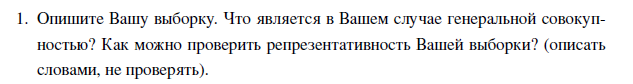

Выборкой являются данные по зарплатам жителей Челябинска в 2023 году. Генеральной совокупностью будут все работающие и получающие зарплату в Челябинске в 2023 году.

**Репрезентативность** выборки можно проверить так: 
1. Сравнить описательные статистики (а первую очередь по зарплате) с данными из открытых источников (Росстат, hh.ru и др.) 
2. Сравнение согласованности факторов и зарплат (например, по логике, зарплаты людей с высшим образованием должны быть выше) 
3. Сравнить доли категориальных признаков (пол, образование, отрасль) с официальной статистикой Росстата по региону 
4. Сравнить количественные признаки (возраст, вес, рост) с медианой/средним из официальной статистики 
5. Посмотреть на распределение зарплат (есть ли выбросы) + проверить, похоже ли распределение зарплат на логнормальное (обычно в экономике зарплаты стремятся к логнормальному распределению)  

# 2

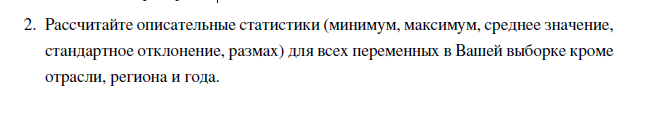

In [15]:
df.columns

Index(['region', 'educ', 'age', 'female', 'industry', 'work_hours', 'wage',
       'foreign_language', 'internet', 'alcohol', 'is_children', 'health',
       'weight', 'height', 'smoke', 'year'],
      dtype='object')

In [16]:
df_for_statistics = df[['educ', 'age', 'female', 'work_hours', 'wage',
       'foreign_language', 'internet', 'alcohol', 'is_children', 'health',
       'weight', 'height', 'smoke']]

In [17]:
statistics = df_for_statistics.describe().loc[['min', 'max', 'mean', 'std']]

statistics.loc['range'] = statistics.loc['max'] - statistics.loc['min']
statistics = statistics.rename(index={
    'min': 'Минимум',
    'max': 'Максимум',
    'mean': 'Среднее',
    'std': 'Стандартное отклонение',
    'range': 'Размах'
})
statistics = statistics.T
statistics['Среднее'] = statistics['Среднее'].round(3)
statistics['Стандартное отклонение'] = statistics['Стандартное отклонение'].round(3)

In [18]:
statistics

,Минимум,Максимум,Среднее,Стандартное отклонение,Размах
educ,0.0,2.0,1.023,0.912,2.0
age,25.5,70.5,46.311,9.952,45.0
female,0.0,1.0,0.538,0.500,1.0
work_hours,2.0,24.0,9.553,3.987,22.0
wage,3000.0,427000.0,48449.697,42556.518,424000.0
foreign_language,0.0,1.0,0.182,0.387,1.0
internet,0.0,1.0,0.962,0.192,1.0
alcohol,0.0,1.0,0.803,0.399,1.0
is_children,1.0,1.0,1.000,0.000,0.0
health,0.0,1.0,0.379,0.487,1.0


# 3

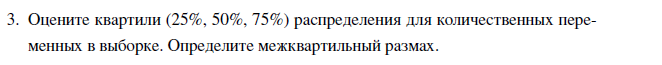

In [21]:
df_for_quartiles = df[['educ', 'age', 'work_hours', 'wage', 'weight', 'height']]

In [22]:
quartiles = df_for_quartiles.describe(percentiles=[0.25, 0.5, 0.75])
quartiles = quartiles.loc[['25%', '50%', '75%']]



In [23]:
quartiles.loc['IQR'] = quartiles.loc['75%'] - quartiles.loc['25%']
quartiles = quartiles.rename(index={
    '25%': 'Q1',
    '50%': 'Медиана',
    '75%': 'Q3',
})
quartiles = quartiles.T
quartiles

,Q1,Медиана,Q3,IQR
educ,0.00,1.00,2.0,2.00
age,39.25,46.75,52.5,13.25
work_hours,8.00,8.00,10.0,2.00
wage,25000.00,40000.00,60000.0,35000.00
weight,68.00,74.00,82.0,14.00
height,164.00,170.00,176.0,12.00


# 4

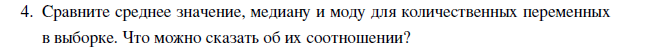

In [26]:
sred = df_for_quartiles.agg(['mean', 'median'])
modes = df_for_quartiles.mode().iloc[0]
sred.loc['mode'] = modes

sred = sred.rename(index={
    'mean': 'Среднее',
    'median': 'Медиана',
    'mode': 'Мода'
}).T

sred

,Среднее,Медиана,Мода
educ,1.022727,1.00,2.0
age,46.310606,46.75,51.0
work_hours,9.553030,8.00,8.0
wage,48449.696970,40000.00,40000.0
weight,75.837121,74.00,70.0
height,169.750000,170.00,170.0


In [27]:
df['educ'].value_counts()

educ
2    56
0    53
1    23
Name: count, dtype: int64

По уровню образования наиболее популярным в выборке является высшее образование, при этом очень много индивидов с школьным образованием.\
Средний возраст в выборке достаточно высокий, при этом выбросов судя по всему особенно нет, так как медиана и среднее почти совпадают.\
Медианное количество рабочих часов в день = 8 часов (стандарт), при этом среднее ~= 9.5 часам, чо говорит о наличии правосторонних выбросов. Интересно исследовать, в какой индустрии заняты такие работники.\
В заработной плате тоже имеются выбросы, при этом медианная заработная плата = 40000\
Рост и вес без особых выбросов, средние и медианы очень близки. Интересно посмотреть отдельно по мужчинам и женщинам

# 5

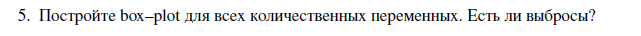

In [31]:
df.head()

,region,educ,age,female,industry,work_hours,wage,foreign_language,internet,alcohol,is_children,health,weight,height,smoke,year
329,Челябинск,0,41.0,1,ДРУГАЯ ОТРАСЛЬ ТЯЖЕЛОЙ ПРОМЫШЛЕННОСТИ,12,100000.0,0,1,1,1,1,81.0,162.0,0,2023
330,Челябинск,0,37.5,1,ДРУГАЯ ОТРАСЛЬ ТЯЖЕЛОЙ ПРОМЫШЛЕННОСТИ,8,20000.0,0,1,1,1,1,58.0,162.0,1,2023
331,Челябинск,1,52.0,0,"ТРАНСПОРТ, СВЯЗЬ",8,50000.0,0,1,1,1,0,83.0,175.0,0,2023
332,Челябинск,2,50.0,1,ОПЕРАЦИИ С НЕДВИЖИМОСТЬЮ,8,40000.0,0,1,1,1,1,79.0,163.0,0,2023
333,Челябинск,0,52.5,1,"ТОРГОВЛЯ, БЫТОВОЕ ОБСЛУЖИВАНИЕ",8,34000.0,0,1,1,1,0,79.0,174.0,0,2023


## Возраст

([], [])

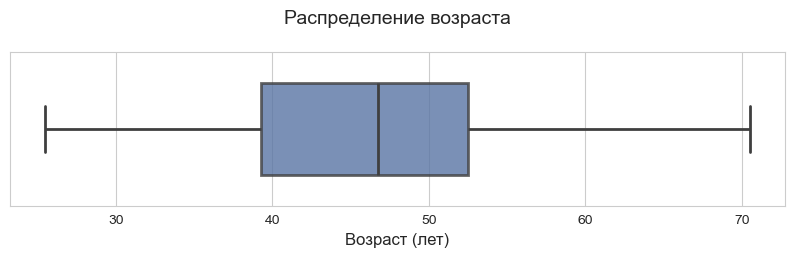

In [33]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 2))
boxplot = sns.boxplot(
    data=df[["age"]], 
    orient="h",
    width=0.6,
    color="#4C72B0",
    linewidth=2,
    flierprops=dict(
        markerfacecolor='#DD8452',
        marker='D', 
        markersize=6
    ),
    boxprops=dict(alpha=0.8)
)
plt.title("Распределение возраста", pad=20, fontsize=14)
plt.xlabel("Возраст (лет)", fontsize=12)
plt.yticks([])

По возрасту выборсов не наблюдается

## Рабочие часы в день

([], [])

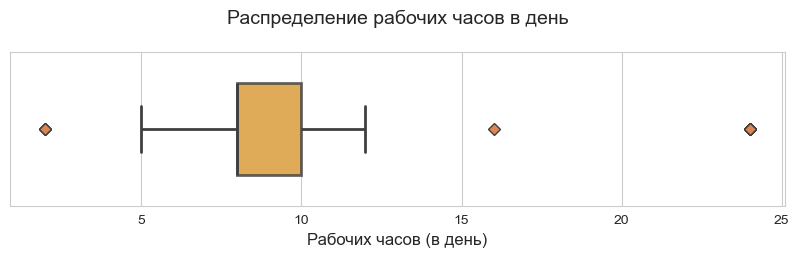

In [36]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 2))
boxplot = sns.boxplot(
    data=df[["work_hours"]], 
    orient="h",
    width=0.6,
    color="#F39C12",
    linewidth=2,
    flierprops=dict(
        markerfacecolor='#DD8452',
        marker='D', 
        markersize=6
    ),
    boxprops=dict(alpha=0.8)
)
plt.title("Распределение рабочих часов в день", pad=20, fontsize=14)
plt.xlabel("Рабочих часов (в день)", fontsize=12)
plt.yticks([])

In [37]:
df[df['work_hours']>12]

,region,educ,age,female,industry,work_hours,wage,foreign_language,internet,alcohol,is_children,health,weight,height,smoke,year
336,Челябинск,0,59.0,0,"ТРАНСПОРТ, СВЯЗЬ",16,55000.0,0,1,1,1,0,86.0,178.0,1,2023
611,Челябинск,0,45.5,0,"АРМИЯ, МВД, ОРГАНЫ БЕЗОПАСНОСТИ",24,15000.0,0,1,1,1,0,62.0,170.0,1,2023
1328,Челябинск,1,51.0,1,ЗДРАВООХРАНЕНИЕ,24,38000.0,0,1,1,1,0,95.0,164.0,0,2023
1495,Челябинск,0,58.5,0,"АРМИЯ, МВД, ОРГАНЫ БЕЗОПАСНОСТИ",24,23000.0,0,1,1,1,0,96.0,178.0,1,2023
2118,Челябинск,0,49.5,0,ЗДРАВООХРАНЕНИЕ,24,25000.0,0,1,1,1,0,76.0,182.0,1,2023
2501,Челябинск,2,33.0,1,"СПОРТ, ТУРИЗМ, РАЗВЛЕЧЕНИЯ",24,17000.0,1,1,1,1,0,54.0,162.0,0,2023
3218,Челябинск,2,46.0,1,"АРМИЯ, МВД, ОРГАНЫ БЕЗОПАСНОСТИ",24,40000.0,0,1,1,1,0,65.0,165.0,0,2023
3490,Челябинск,0,40.0,0,ДРУГАЯ ОТРАСЛЬ ТЯЖЕЛОЙ ПРОМЫШЛЕННОСТИ,24,54000.0,0,1,1,1,0,71.0,170.0,1,2023


В распределении рабочих часов присутсвуют выбросы, при этом почти у всех выбросов 24 рабочих часа в день. Предполагаю, что эти люди просто работают по графику сутки-трое или сутки-сутки

## Заработная плата

([], [])

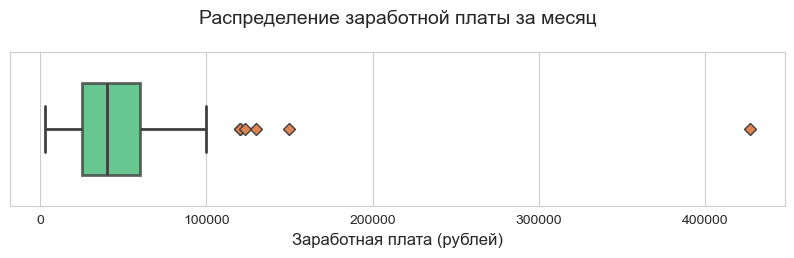

In [40]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 2))
boxplot = sns.boxplot(
    data=df[["wage"]], 
    orient="h",
    width=0.6,
    color="#2ECC71",
    linewidth=2,
    flierprops=dict(
        markerfacecolor='#DD8452',
        marker='D', 
        markersize=6
    ),
    boxprops=dict(alpha=0.8)
)
plt.title("Распределение заработной платы за месяц", pad=20, fontsize=14)
plt.xlabel("Заработная плата (рублей)", fontsize=12)
plt.yticks([])

По заработной плате ожидаемо есть выбросы в правом хвосте

## Вес

([], [])

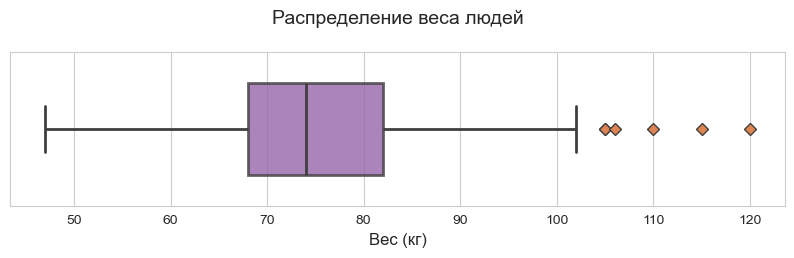

In [43]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 2))
boxplot = sns.boxplot(
    data=df[["weight"]], 
    orient="h",
    width=0.6,
    color="#9B59B6",
    linewidth=2,
    flierprops=dict(
        markerfacecolor='#DD8452',
        marker='D', 
        markersize=6
    ),
    boxprops=dict(alpha=0.8)
)
plt.title("Распределение веса людей", pad=20, fontsize=14)
plt.xlabel("Вес (кг)", fontsize=12)
plt.yticks([])

По весу есть выбросы в правом хвосте, в основном это мужчины

In [45]:
df[df['weight']>100]

,region,educ,age,female,industry,work_hours,wage,foreign_language,internet,alcohol,is_children,health,weight,height,smoke,year
1329,Челябинск,0,50.0,0,СТРОИТЕЛЬСТВО,10,25000.0,0,1,1,1,1,115.0,183.0,1,2023
1578,Челябинск,2,55.0,1,ЭНЕРГЕТИЧЕСКАЯ ПРОМЫШЛЕННОСТЬ,8,55000.0,0,1,1,1,1,110.0,170.0,0,2023
1579,Челябинск,2,67.0,0,ОБРАЗОВАНИЕ,8,40000.0,0,1,1,1,0,105.0,173.0,0,2023
1654,Челябинск,2,58.0,0,ЮРИСПРУДЕНЦИЯ,10,120000.0,1,1,1,1,0,120.0,185.0,0,2023
2625,Челябинск,1,51.5,0,ДРУГАЯ ОТРАСЛЬ ТЯЖЕЛОЙ ПРОМЫШЛЕННОСТИ,8,40000.0,0,1,1,1,0,105.0,190.0,0,2023
3611,Челябинск,2,35.5,0,"ТРАНСПОРТ, СВЯЗЬ",12,60000.0,0,1,1,1,0,102.0,182.0,1,2023
3877,Челябинск,1,43.0,0,"ЛЕГКАЯ, ПИЩЕВАЯ ПРОМЫШЛЕННОСТЬ",8,150000.0,0,1,1,1,0,106.0,185.0,1,2023


## Рост

([], [])

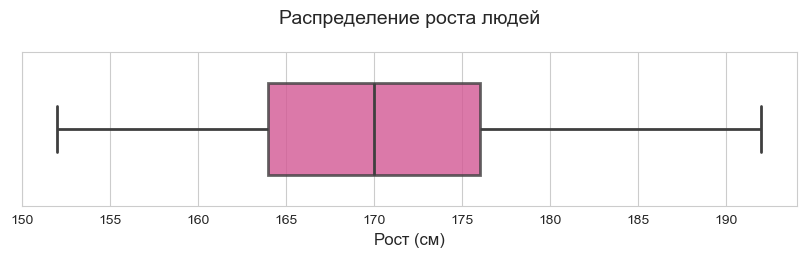

In [47]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 2))
boxplot = sns.boxplot(
    data=df[["height"]], 
    orient="h",
    width=0.6,
    color="#E84393",
    linewidth=2,
    flierprops=dict(
        markerfacecolor='#DD8452',
        marker='D', 
        markersize=6
    ),
    boxprops=dict(alpha=0.8)
)
plt.title("Распределение роста людей", pad=20, fontsize=14)
plt.xlabel("Рост (см)", fontsize=12)
plt.yticks([])

По росту выбросов в выборке нет

# 6

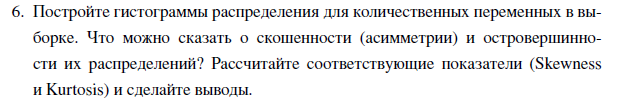

In [51]:
from scipy.stats import skew
from scipy.stats import kurtosis

## Возраст

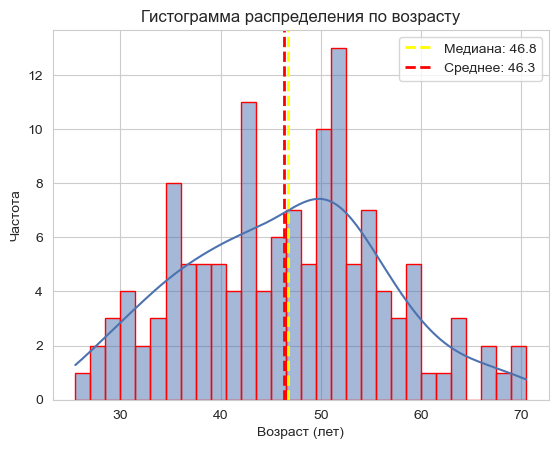

In [53]:
sns.histplot(df['age'], bins=30, kde=True, color='#4C72B0', edgecolor='red')

plt.axvline(df['age'].median(), color='yellow', linestyle='--', linewidth=2, label=f'Медиана: {df['age'].median():.1f}')
plt.axvline(df['age'].mean(), color='red', linestyle='--', linewidth=2, label=f'Среднее: {df['age'].mean():.1f}')

plt.xlabel('Возраст (лет)')
plt.ylabel('Частота')
plt.title('Гистограмма распределения по возрасту')
plt.legend()
plt.show()

In [54]:
skewness = skew(df['age'], nan_policy='omit')
print(f'Skewness: {skewness:.2f}')

Skewness: 0.08


Расчёт коэффициента асимметрии (skewness = 0.08) показывает, что распределение возраста в выборке работающих Челябинцев является **практически симметричным**, без существенного смещения в сторону более молодых или пожилых значений.

In [56]:
kurt = kurtosis(df['age'], fisher=True, nan_policy='omit')
print(f"Kurtosis: {kurt:.2f}")

Kurtosis: -0.46


Распределение возраста является менее заостренным по сравнению с нормальным. Нет тяжелых хвостов и сильной концентрации вокруг среднего, соответственно **нет проблем с выбросами.**

**Нет выраженных пиков и хвостов**

## Рабочие часы в день

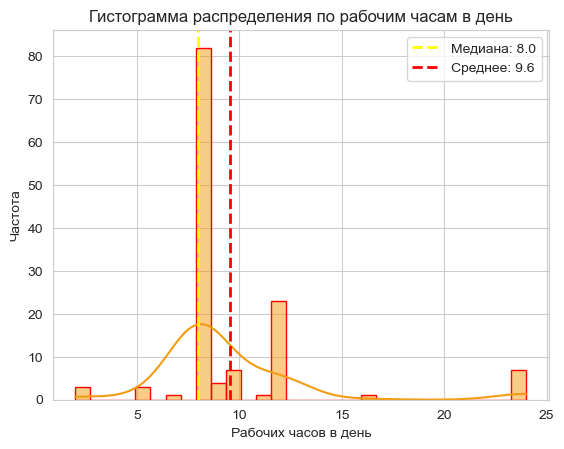

In [60]:
sns.histplot(df['work_hours'], bins=30, kde=True, color='#F39C12', edgecolor='red')

plt.axvline(df['work_hours'].median(), color='yellow', linestyle='--', linewidth=2, label=f'Медиана: {df['work_hours'].median():.1f}')
plt.axvline(df['work_hours'].mean(), color='red', linestyle='--', linewidth=2, label=f'Среднее: {df['work_hours'].mean():.1f}')

plt.xlabel('Рабочих часов в день')
plt.ylabel('Частота')
plt.title('Гистограмма распределения по рабочим часам в день')
plt.legend()
plt.show()

In [61]:
skewness = skew(df['work_hours'], nan_policy='omit')
print(f'Skewness: {skewness:.2f}')

kurt = kurtosis(df['work_hours'], fisher=True, nan_policy='omit')
print(f"Kurtosis: {kurt:.2f}")

Skewness: 2.40
Kurtosis: 6.71


Skewness =  2.4 => **существенная правосторонняя асимметрия**, порожденная рассмотренными выше выбросами (16, 24 рабочих часа). У большинства людей рабочее время ~=8 часов, что меньше среднего, но есть экстремально высокие знчения.\
Kurtosis = 6.71 => **узкий, высокий пик (как раз = 8 часам), и тяжелые хвосты, особенно правый хвост**

## Заработная плата

In [64]:
df[df['wage']>100000]

,region,educ,age,female,industry,work_hours,wage,foreign_language,internet,alcohol,is_children,health,weight,height,smoke,year
1325,Челябинск,2,36.0,0,ДРУГАЯ ОТРАСЛЬ ТЯЖЕЛОЙ ПРОМЫШЛЕННОСТИ,8,427000.0,0,1,1,1,1,96.0,184.0,0,2023
1654,Челябинск,2,58.0,0,ЮРИСПРУДЕНЦИЯ,10,120000.0,1,1,1,1,0,120.0,185.0,0,2023
2107,Челябинск,2,46.0,0,СТРОИТЕЛЬСТВО,10,130000.0,0,1,1,1,0,75.0,181.0,0,2023
3612,Челябинск,2,35.5,0,"НАУКА, КУЛЬТУРА",8,120000.0,1,1,1,1,0,58.0,179.0,0,2023
3877,Челябинск,1,43.0,0,"ЛЕГКАЯ, ПИЩЕВАЯ ПРОМЫШЛЕННОСТЬ",8,150000.0,0,1,1,1,0,106.0,185.0,1,2023
4329,Челябинск,2,50.0,1,"ТОРГОВЛЯ, БЫТОВОЕ ОБСЛУЖИВАНИЕ",8,123000.0,1,1,1,1,1,69.0,155.0,0,2023


In [65]:
df.shape

(132, 16)

In [66]:
6/132

0.045454545454545456

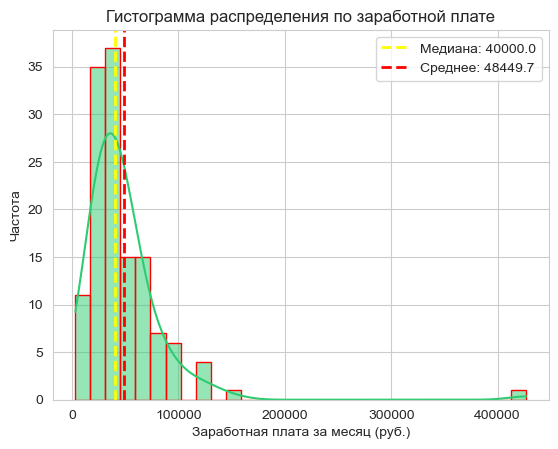

In [67]:
sns.histplot(df['wage'], bins=30, kde=True, color='#2ECC71', edgecolor='red')

plt.axvline(df['wage'].median(), color='yellow', linestyle='--', linewidth=2, label=f'Медиана: {df['wage'].median():.1f}')
plt.axvline(df['wage'].mean(), color='red', linestyle='--', linewidth=2, label=f'Среднее: {df['wage'].mean():.1f}')

plt.xlabel('Заработная плата за месяц (руб.)')
plt.ylabel('Частота')
plt.title('Гистограмма распределения по заработной плате')
plt.legend()
plt.show()

In [68]:
df['wage'].describe()

count       132.000000
mean      48449.696970
std       42556.517929
min        3000.000000
25%       25000.000000
50%       40000.000000
75%       60000.000000
max      427000.000000
Name: wage, dtype: float64

In [69]:
skewness = skew(df['wage'], nan_policy='omit')
print(f'Skewness: {skewness:.2f}')

kurt = kurtosis(df['wage'], fisher=True, nan_policy='omit')
print(f"Kurtosis: {kurt:.2f}")

Skewness: 5.65
Kurtosis: 45.87


Skewness =  5.65 => **существенная правосторонняя асимметрия**, порожденная аномально высокими зарплатами. У большинства людей в Челябинске средняя или низкая зарплата, но присутствуют люди с очень высокой. При этом среднее не намного выше медианы, так как **выбросов не так много, всего 4.5% выше третьего квартиля** (зачастую в зарплатах разница между средним и медианой существеннее). Высокой зарплатой могут обладать бизнесмены, которые могли попасть в выборку.\
Kurtosis: 45.87 => **очень тяжелый правый хвост**, но он в данном случае преимущественно выражен одним очень большим наблюдением (427 тыс руб, что в 10+ раз больше медианы). Остальные выбросы недалеко от границы IQR.

Ради интереса посмотрим как измениятся показатели, если удалить этот выброс:

In [72]:
df_min1 = df[df['wage']!=427000.0]
skewness = skew(df_min1['wage'], nan_policy='omit')
print(f'Skewness: {skewness:.2f}')

kurt = kurtosis(df_min1['wage'], fisher=True, nan_policy='omit')
print(f"Kurtosis: {kurt:.2f}")

Skewness: 1.39
Kurtosis: 2.17


Как я и предполагал, львиную долю асимметрии и островершинности порождал 1 выброс

**Посмотрим на логарифмированную заработную плату:**

In [75]:
df['ln_wage'] = np.log(df['wage'])

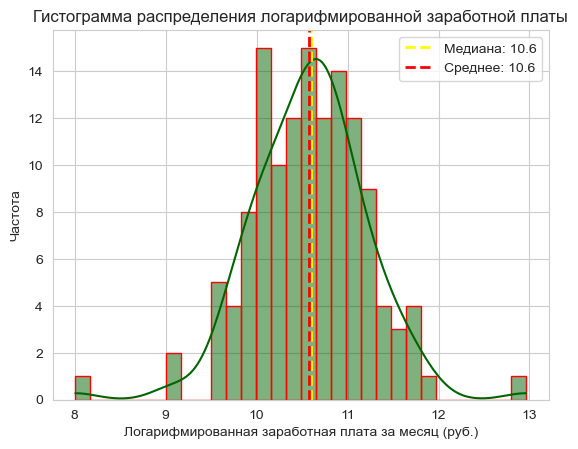

In [76]:
sns.histplot(df['ln_wage'], bins=30, kde=True, color='darkgreen', edgecolor='red')

plt.axvline(df['ln_wage'].median(), color='yellow', linestyle='--', linewidth=2, label=f'Медиана: {df['ln_wage'].median():.1f}')
plt.axvline(df['ln_wage'].mean(), color='red', linestyle='--', linewidth=2, label=f'Среднее: {df['ln_wage'].mean():.1f}')

plt.xlabel('Логарифмированная заработная плата за месяц (руб.)')
plt.ylabel('Частота')
plt.title('Гистограмма распределения логарифмированной заработной платы')
plt.legend()
plt.show()

Распределение заработной платы в выборке стремится к логнормальному

## Вес

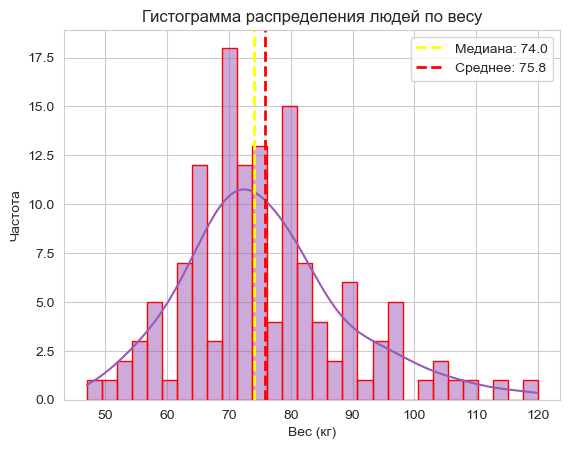

In [79]:
sns.histplot(df['weight'], bins=30, kde=True, color='#9B59B6', edgecolor='red')

plt.axvline(df['weight'].median(), color='yellow', linestyle='--', linewidth=2, label=f'Медиана: {df['weight'].median():.1f}')
plt.axvline(df['weight'].mean(), color='red', linestyle='--', linewidth=2, label=f'Среднее: {df['weight'].mean():.1f}')

plt.xlabel('Вес (кг)')
plt.ylabel('Частота')
plt.title('Гистограмма распределения людей по весу')
plt.legend()
plt.show()

In [80]:
skewness = skew(df['weight'], nan_policy='omit')
print(f'Skewness: {skewness:.2f}')

kurt = kurtosis(df['weight'], fisher=True, nan_policy='omit')
print(f"Kurtosis: {kurt:.2f}")

Skewness: 0.73
Kurtosis: 0.81


Skewness = 0.76 => **умеренная правосторонняя асимметрия**, среднее чуть выше медианы, так как есть группа людей весом >100кг но сдвиг некритичный, как мне кажется, каких-то дополнительных преобразований (например, логарифмирования) не требуется.\
Kurtosis = 0.91 => **небольшое количество умеренных выбросов**

## Рост

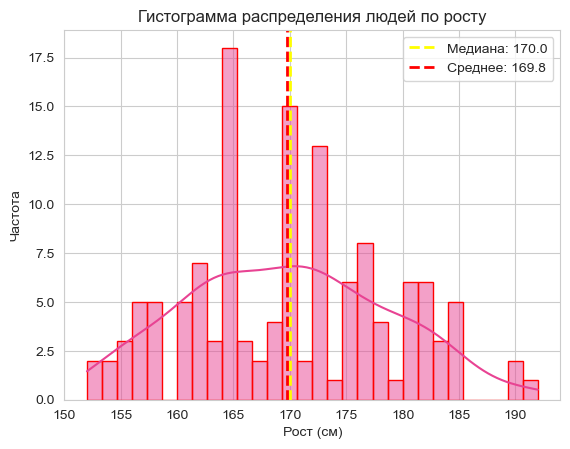

In [83]:
sns.histplot(df['height'], bins=30, kde=True, color='#E84393', edgecolor='red')

plt.axvline(df['height'].median(), color='yellow', linestyle='--', linewidth=2, label=f'Медиана: {df['height'].median():.1f}')
plt.axvline(df['height'].mean(), color='red', linestyle='--', linewidth=2, label=f'Среднее: {df['height'].mean():.1f}')

plt.xlabel('Рост (см)')
plt.ylabel('Частота')
plt.title('Гистограмма распределения людей по росту')
plt.legend()
plt.show()

In [84]:
skewness = skew(df['height'], nan_policy='omit')
print(f'Skewness: {skewness:.2f}')

kurt = kurtosis(df['height'], fisher=True, nan_policy='omit')
print(f"Kurtosis: {kurt:.2f}")

Skewness: 0.16
Kurtosis: -0.61


Skewness: 0.17 => почти = 0, значит **распределение симметрично**. Среднее почти в точности = медиане.\
Kurtosis: -0.58 => **распределение более плоское, чем нормальное.** Больше значений расположено на умеренном расстоянии от центра, а не в хвостах. Нет ярко выраженного среднего значения, около которого сосредоточены данные. Данные удобны для статистического анализа.

# 6*

# Категориальные переменные

## Пол

In [91]:
df['female_1'] = df['female'].map({1: 'Женщины', 0: 'Мужчины'})

C:\Users\User\AppData\Local\Temp\ipykernel_13816\621670092.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


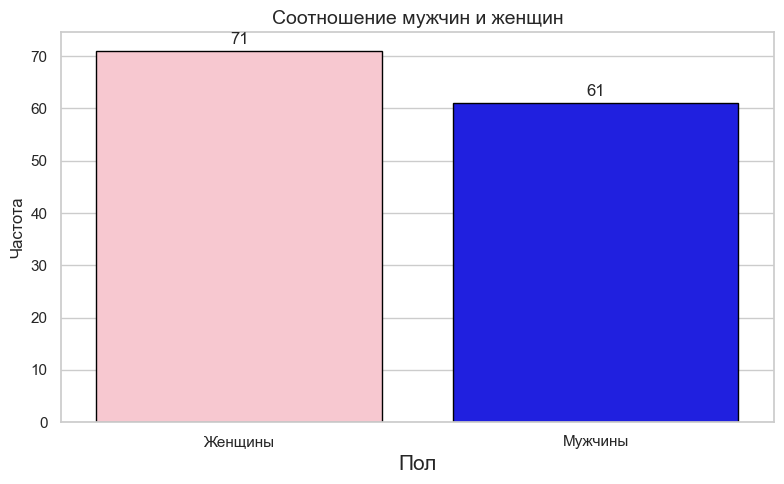

In [92]:
plt.figure(figsize=(8, 5))
sns.set_theme(style="whitegrid")

ax = sns.countplot(
    data=df,
    x='female_1',
    palette=['pink', 'blue'], 
    edgecolor='black'
)

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)

plt.title('Соотношение мужчин и женщин', fontsize=14)
plt.xlabel('Пол', fontsize=15)
plt.ylabel('Частота', fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()

Распределение мужчин и женщин в выборке примерно равномерное

## Знание иностранного языка

In [95]:
df['foreign_language_1'] = df['foreign_language'].map({0: 'Не знает иностранный язык', 1: 'Знает иностранный язык'})

C:\Users\User\AppData\Local\Temp\ipykernel_13816\3402310721.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


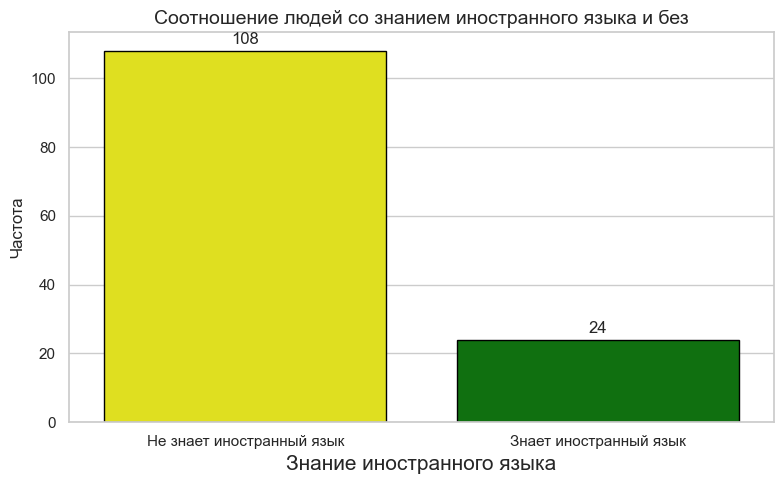

In [96]:
plt.figure(figsize=(8, 5))
sns.set_theme(style="whitegrid")

ax = sns.countplot(
    data=df,
    x='foreign_language_1',
    palette=['yellow', 'green'], 
    edgecolor='black'
)

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)

plt.title('Соотношение людей со знанием иностранного языка и без', fontsize=14)
plt.xlabel('Знание иностранного языка', fontsize=15)
plt.ylabel('Частота', fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()

Ожидаемо, **малая часть жителей Челябинска владеет иностранным языком**

## Пользование интернетом

In [99]:
df['internet_1'] = df['internet'].map({0: 'Не пользовался интернетом в последний год', 1: 'Пользовался интернетом в последний год'})

In [100]:
df['internet'].value_counts()

internet
1    127
0      5
Name: count, dtype: int64

C:\Users\User\AppData\Local\Temp\ipykernel_13816\4211599179.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


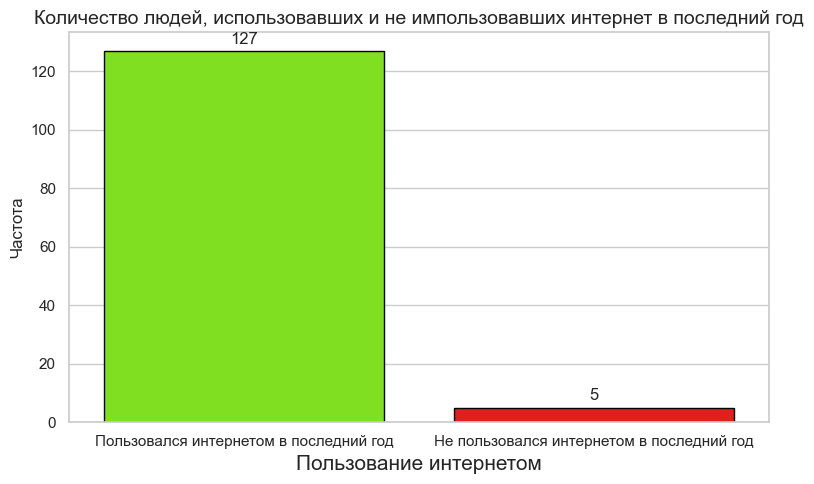

In [101]:
plt.figure(figsize=(8, 5))
sns.set_theme(style="whitegrid")

ax = sns.countplot(
    data=df,
    x='internet_1',
    palette=['chartreuse', 'red'], 
    edgecolor='black'
)

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)

plt.title('Количество людей, использовавших и не импользовавших интернет в последний год', fontsize=14)
plt.xlabel('Пользование интернетом', fontsize=15)
plt.ylabel('Частота', fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()

Ожидаемо, **почти все люди в выборке пользуются интернетом**

In [103]:
df[df['internet']==0]['age'].describe()

count     5.000000
mean     64.500000
std       6.354133
min      56.500000
25%      59.000000
50%      67.000000
75%      69.500000
max      70.500000
Name: age, dtype: float64

Как я и предполагал, не пользуются интернетом только люди **старше 55**

## Употребление алкоголя

In [106]:
df['alcohol'].value_counts()

alcohol
1    106
0     26
Name: count, dtype: int64

Большая часть респондентов хотя бы изредка употребляет алкоголь

## Проблемы со здоровьем за последний месяц

In [109]:
df['health'].value_counts()

health
0    82
1    50
Name: count, dtype: int64

Более трети ремпондентов испытывали проблемы со здоровьем за последний месяц. Это достаточно высокий показатель. **В Челябинске серьезные проблемы с экологией**, что может быть важной причиной столь высокого показателя. Скорее всего, значимую часть проблем со здоровьем в выборке составляют заболевания дыхательных путей, сердечные заболевания.

## Наличие детей

In [112]:
df['is_children'].value_counts()

is_children
1    132
Name: count, dtype: int64

In [113]:
df['age'].min()

25.5

Интересно, что **у всех респондентов есть хотя бы 1 ребенок**. Возможно, это было вложено в критерии опроса

## Курение

In [116]:
df['smoke'].value_counts()

smoke
0    82
1    50
Name: count, dtype: int64

Почти 40% респондентов - курильщики. **Это в ~1.5 раза больше, чем доля в целом по России**. Это тоже одна из причин большого количества обращений к врачам

# 7

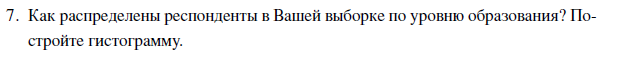

In [120]:
df['educ'].value_counts()

educ
2    56
0    53
1    23
Name: count, dtype: int64

In [121]:
df['educ_level'] = df['educ'].map({0: 'Школа', 1: 'ПТУ, техническое училище', 2: 'Университет, академия, институт'})

C:\Users\User\AppData\Local\Temp\ipykernel_13816\2710990612.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


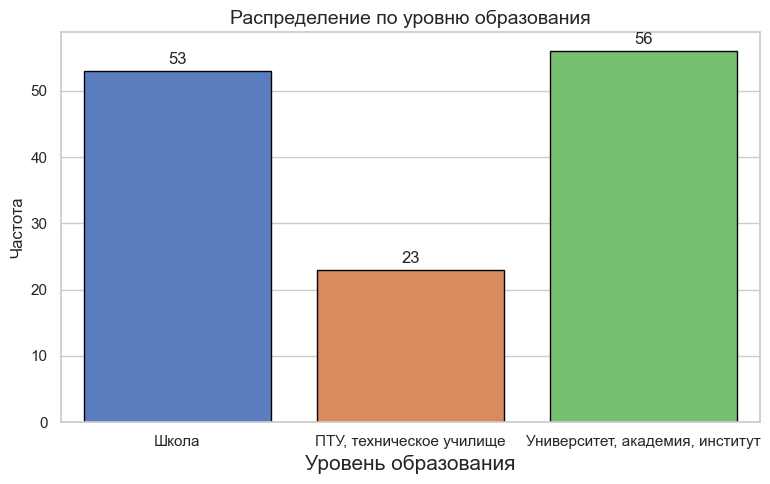

In [122]:
plt.figure(figsize=(8, 5))
sns.set_theme(style="whitegrid")

# Построение графика
ax = sns.countplot(
    data=df,
    x='educ_level',
    palette='muted', 
    edgecolor='black'
)

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)

plt.title('Распределение по уровню образования', fontsize=14)
plt.xlabel('Уровень образования', fontsize=15)
plt.ylabel('Частота', fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()

Интересно посмотреть на **распределения возрастов** людей с разным уровнем образования:

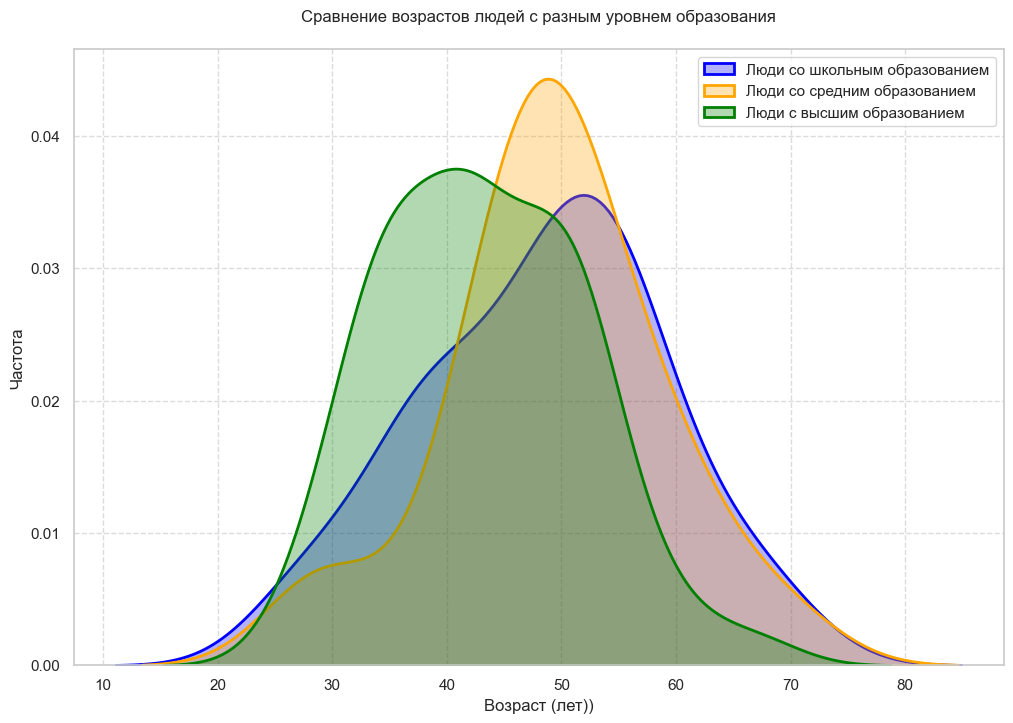

In [124]:
data_school = df[df['educ_level'] == 'Школа']['age']  
data_ptu = df[df['educ_level'] == 'ПТУ, техническое училище']['age']
data_higher = df[df['educ_level'] == 'Университет, академия, институт']['age']
plt.figure(figsize=(12, 8), dpi=100)
sns.kdeplot(
    data=data_school,
    color="blue",
    label="Люди со школьным образованием",
    linewidth=2,
    fill=True,  
    alpha=0.3,  
)

sns.kdeplot(
    data=data_ptu,
    color="orange",
    label="Люди со средним образованием",
    linewidth=2,
    fill=True,
    alpha=0.3,
)

sns.kdeplot(
    data=data_higher,
    color="green",
    label="Люди с высшим образованием",
    linewidth=2,
    fill=True,
    alpha=0.3,
)


plt.title("Сравнение возрастов людей с разным уровнем образования", pad=20)
plt.xlabel("Возраст (лет))")
plt.ylabel("Частота")
plt.legend(loc="upper right")  
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

In [125]:
df[df['educ_level'] == 'Школа']['age'].describe()

count    53.000000
mean     48.349057
std      10.617740
min      25.500000
25%      40.000000
50%      50.000000
75%      55.500000
max      70.500000
Name: age, dtype: float64

Как ни странно, в среднем люди, получившие только школьное образование, самые старшие в выборке. Это может быть связано с **трудностью получения образования в Челябинске в период их молодости**. Челябинск - промышленный город, и, видимо, большая часть людей, родившихся в 70е-80е года 20 века устраивалась на заводы после школы.

# 8

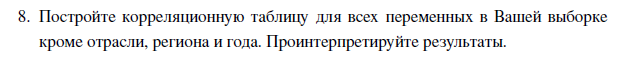

In [129]:
df.columns

Index(['region', 'educ', 'age', 'female', 'industry', 'work_hours', 'wage',
       'foreign_language', 'internet', 'alcohol', 'is_children', 'health',
       'weight', 'height', 'smoke', 'year', 'ln_wage', 'female_1',
       'foreign_language_1', 'internet_1', 'educ_level'],
      dtype='object')

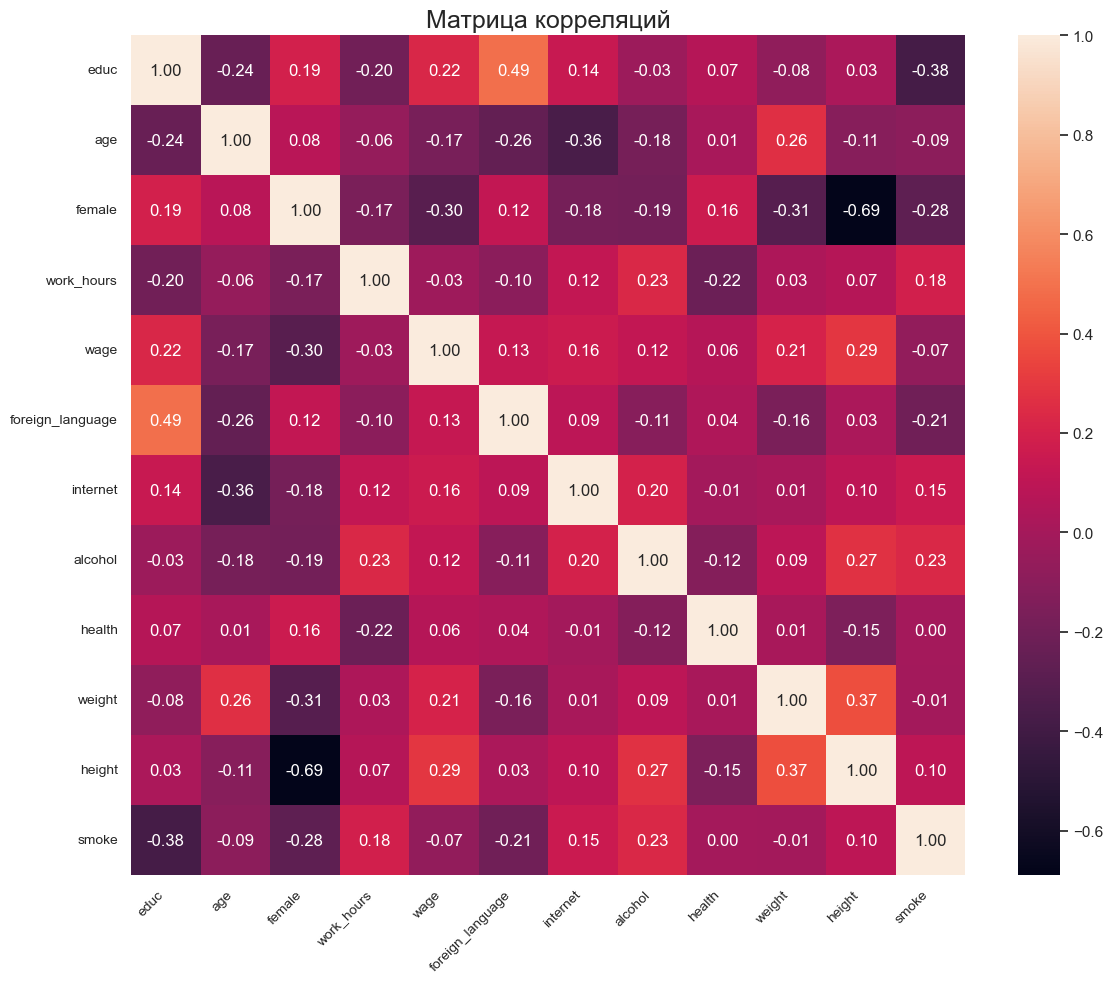

In [130]:
plt.figure(figsize=(12, 10))

sns.heatmap(df[['educ', 'age', 'female', 'work_hours', 'wage',
       'foreign_language', 'internet', 'alcohol', 'health',
       'weight', 'height', 'smoke']].corr(), annot=True, fmt=".2f")

plt.title("Матрица корреляций", fontsize=18)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

Заметим, что в матрице **нет сильных линейных связей (>0.7)**.\
Самая высокая по модулю связь - между полом и ростом (что подтверждает половые различия).\
Ожидаема умеренная положительная связь (0.36) между ростом и весом, подтверждающая **физиологические особенности**.\
Интересно, что есть заметная положительная взаимосвязь между **ростом и заработной платой**.\
Корреляция заработной платы с рабочими часами = 0, что ожидаемо, так как люди с большим количеством рабочих часов **работают сутками**, что не сказывается на общем количестве рабочих часов в месяц.\
Уровень образования заметно связан с владением иностранным языком, что логично, так как чем выше уровень образования, тем вероятнее человек серьезно занимался изучением языков. Также есть средняя отрицательная связь между уровнем образования и курением, что говорит о **меньшей приверженности образованных людей к вредным привычкам**.

# 9

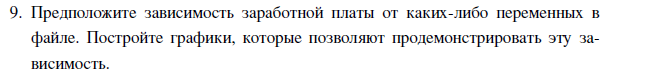

In [134]:
dfc = df.copy()

In [135]:
df.columns

Index(['region', 'educ', 'age', 'female', 'industry', 'work_hours', 'wage',
       'foreign_language', 'internet', 'alcohol', 'is_children', 'health',
       'weight', 'height', 'smoke', 'year', 'ln_wage', 'female_1',
       'foreign_language_1', 'internet_1', 'educ_level'],
      dtype='object')

In [136]:
df = df[['region', 'educ', 'age', 'female', 'industry', 'work_hours', 'wage',
       'foreign_language', 'internet', 'alcohol', 'is_children', 'health',
       'weight', 'height', 'smoke', 'ln_wage', 'educ_level',]]

In [137]:
df

,region,educ,age,female,industry,work_hours,wage,foreign_language,internet,alcohol,is_children,health,weight,height,smoke,ln_wage,educ_level
329,Челябинск,0,41.0,1,ДРУГАЯ ОТРАСЛЬ ТЯЖЕЛОЙ ПРОМЫШЛЕННОСТИ,12,100000.0,0,1,1,1,1,81.0,162.0,0,11.512925,Школа
330,Челябинск,0,37.5,1,ДРУГАЯ ОТРАСЛЬ ТЯЖЕЛОЙ ПРОМЫШЛЕННОСТИ,8,20000.0,0,1,1,1,1,58.0,162.0,1,9.903488,Школа
331,Челябинск,1,52.0,0,"ТРАНСПОРТ, СВЯЗЬ",8,50000.0,0,1,1,1,0,83.0,175.0,0,10.819778,"ПТУ, техническое училище"
332,Челябинск,2,50.0,1,ОПЕРАЦИИ С НЕДВИЖИМОСТЬЮ,8,40000.0,0,1,1,1,1,79.0,163.0,0,10.596635,"Университет, академия, институт"
333,Челябинск,0,52.5,1,"ТОРГОВЛЯ, БЫТОВОЕ ОБСЛУЖИВАНИЕ",8,34000.0,0,1,1,1,0,79.0,174.0,0,10.434116,Школа
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4325,Челябинск,2,55.0,0,ИНФОРМАЦИОННЫЕ И КОММУНИКАЦИОННЫЕ ТЕХНОЛОГИИ,8,100000.0,0,1,1,1,1,66.0,190.0,0,11.512925,"Университет, академия, институт"
4326,Челябинск,1,46.5,0,ГРАЖДАНСКОЕ МАШИНОСТРОЕНИЕ,12,80000.0,0,1,1,1,0,78.0,176.0,0,11.289782,"ПТУ, техническое училище"
4327,Челябинск,0,56.0,0,СТРОИТЕЛЬСТВО,8,20000.0,0,1,1,1,0,68.0,176.0,1,9.903488,Школа
4328,Челябинск,0,25.5,0,"ТОРГОВЛЯ, БЫТОВОЕ ОБСЛУЖИВАНИЕ",9,28000.0,0,1,1,1,1,70.0,178.0,1,10.239960,Школа


## Зависимость заработной платы от уровня образования

Гипотеза: **чем выше уровень образования**, тем выше заработная плата, так как образоавание является основополагающим фактором для доступа к высококвалифицированным, высокооплачиваемым должностям.

C:\Users\User\AppData\Local\Temp\ipykernel_13816\83333342.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='educ_level', y='wage', data=df, palette='muted')


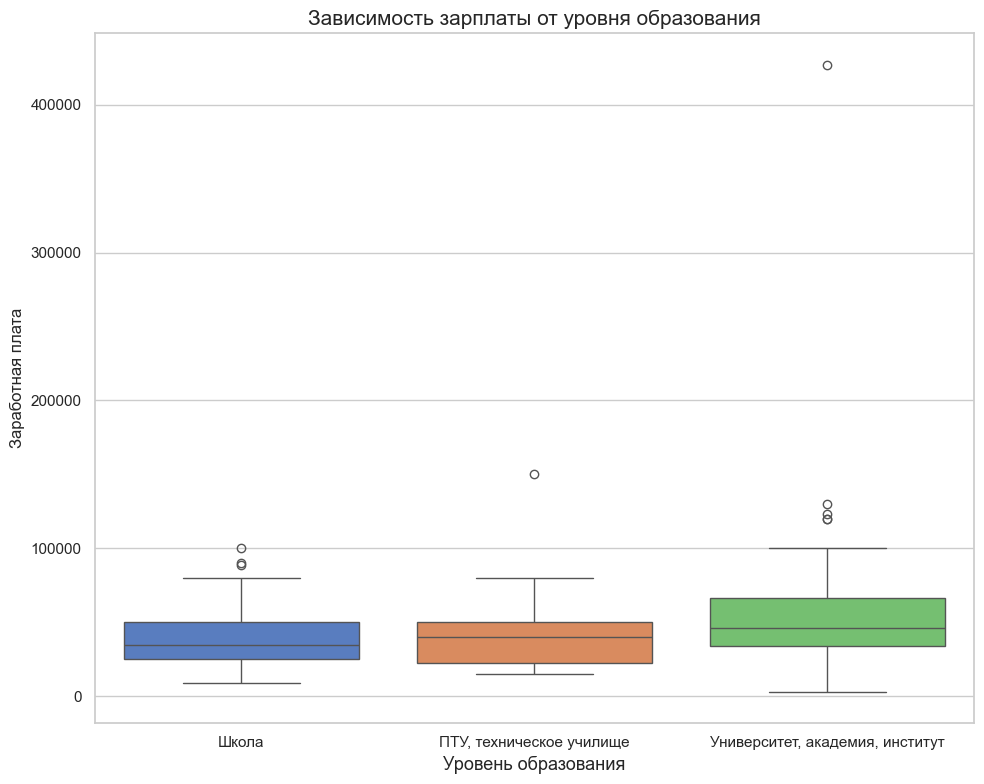

In [140]:
plt.figure(figsize=(10, 8))
sns.set_theme(style="whitegrid")

sns.boxplot(x='educ_level', y='wage', data=df, palette='muted')
plt.title('Зависимость зарплаты от уровня образования', fontsize=15)
plt.xlabel('Уровень образования', fontsize=13)
plt.ylabel('Заработная плата')
plt.tight_layout()
plt.show()

**Гипотеза подтверждается**. Зарплата располагается в очередности Школьное образование - Среднее образование - Высшее образование

C:\Users\User\AppData\Local\Temp\ipykernel_13816\2470053336.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='educ_level', y='wage', data=df, estimator='mean', ci='sd', palette='muted')
C:\Users\User\AppData\Local\Temp\ipykernel_13816\2470053336.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='educ_level', y='wage', data=df, estimator='mean', ci='sd', palette='muted')


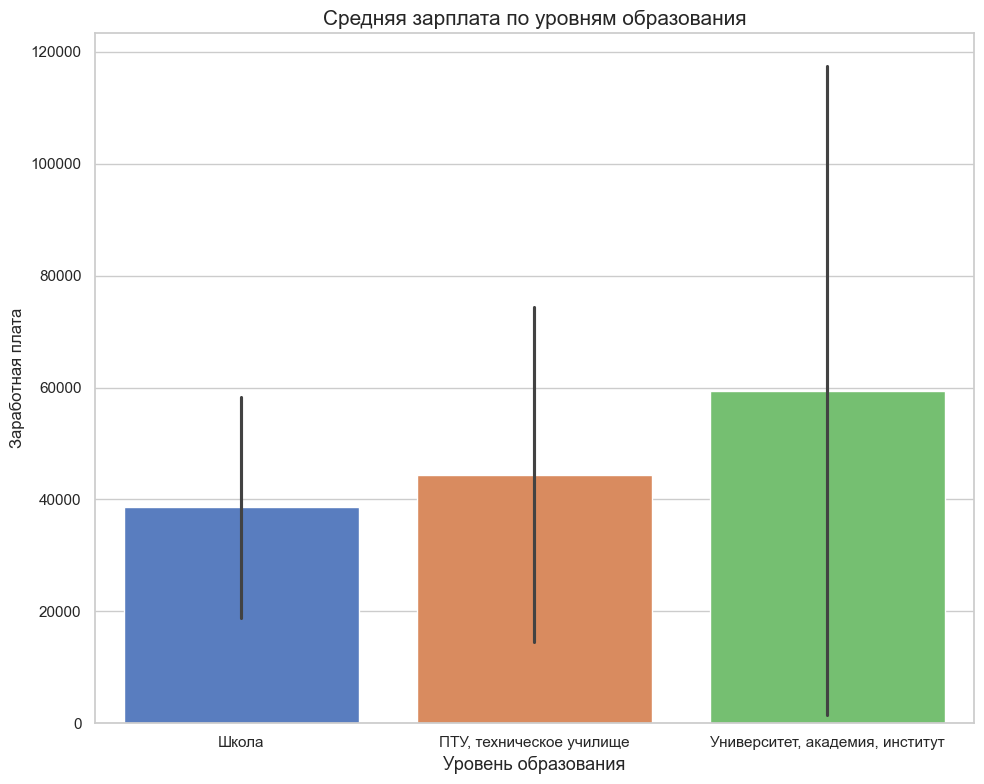

In [142]:
plt.figure(figsize=(10, 8))
sns.set_theme(style="whitegrid")

sns.barplot(x='educ_level', y='wage', data=df, estimator='mean', ci='sd', palette='muted')
plt.title('Средняя зарплата по уровням образования', fontsize=15)
plt.xlabel('Уровень образования', fontsize=13)
plt.ylabel('Заработная плата')
plt.tight_layout()
plt.show()

## Зависимость заработной платы от возраста

Гипотеза: **Зависимость заработной платы от возраста - затухающая**. В молодости, с набором опыта зарплата сотрудников обычно растет, но потом достигает пика и снижается по мере движения к пенсионному возрасту.

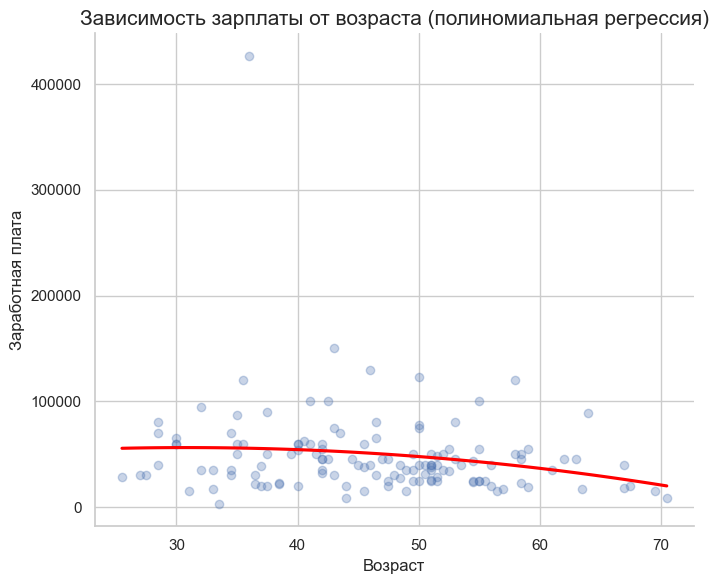

In [145]:
sns.lmplot(x='age', y='wage', data=df, order=2, ci=None, height=6, aspect=1.2,
           scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('Зависимость зарплаты от возраста (полиномиальная регрессия)', fontsize=15)
plt.xlabel('Возраст')
plt.ylabel('Заработная плата')
plt.tight_layout()
plt.show()

Гипотеза подтверждается на данных. До ~40 лет зарплата растет, а потом начинает снижаться. Это связано с тем, что после 40 лет люди часто переходят на менее интенсивную работу, так как здоровье уже не то и сил не хватает. Также сказывактся тенденция **приоритизации рынка на молодых специалистов**. Карьерные исследования показывают, что **чем старше человек, тем сложнее ему найти работу**, тем более высокооплачиваемую. 

Посмотрим на влияние отдельно для мужчин и женщин

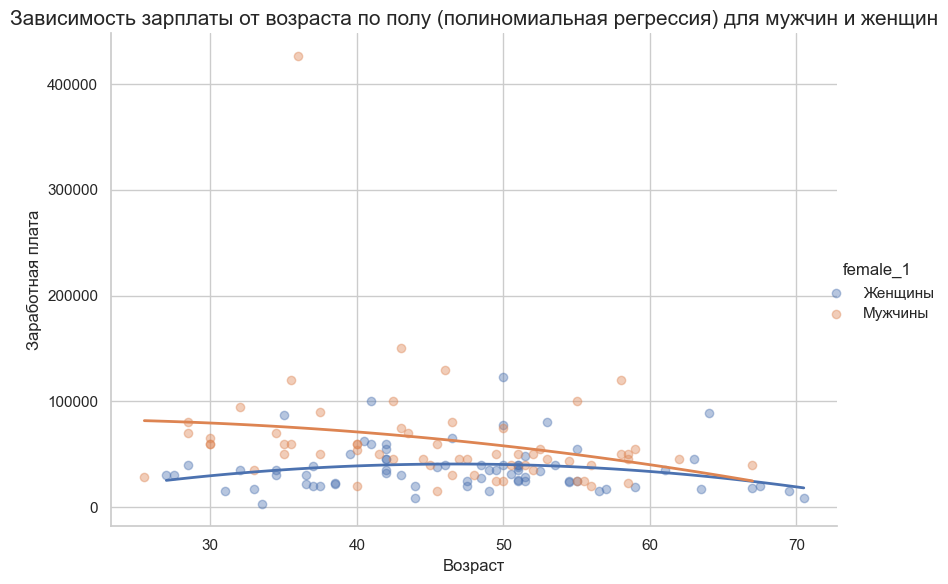

In [148]:
sns.lmplot(
    x='age',
    y='wage',
    hue='female_1',
    data=dfc,
    order=2, 
    ci=None,
    height=6,
    aspect=1.2,
    scatter_kws={'alpha': 0.4},
    line_kws={'linewidth': 2}
)

plt.title('Зависимость зарплаты от возраста по полу (полиномиальная регрессия) для мужчин и женщин', fontsize=15)
plt.xlabel('Возраст')
plt.ylabel('Заработная плата')
plt.tight_layout()
plt.show()


Заметим, что **у женщин снижение зарплаты начинается позже** - после 50 лет. При этом **зарплаты мужчин на всем возрастном интервале выше**. Это связано с разницей в карьерных возможностях, вынужденных перерывах в занятости или неполной занятости из-за необходимости ухода за детьми. Зависимость у обоих полов затухающая, нелинейная. 

## Зависимость заработной платы от вредных привычек

Гипотеза: **наличие вредных привычек пагубно влияет на заработную плату**

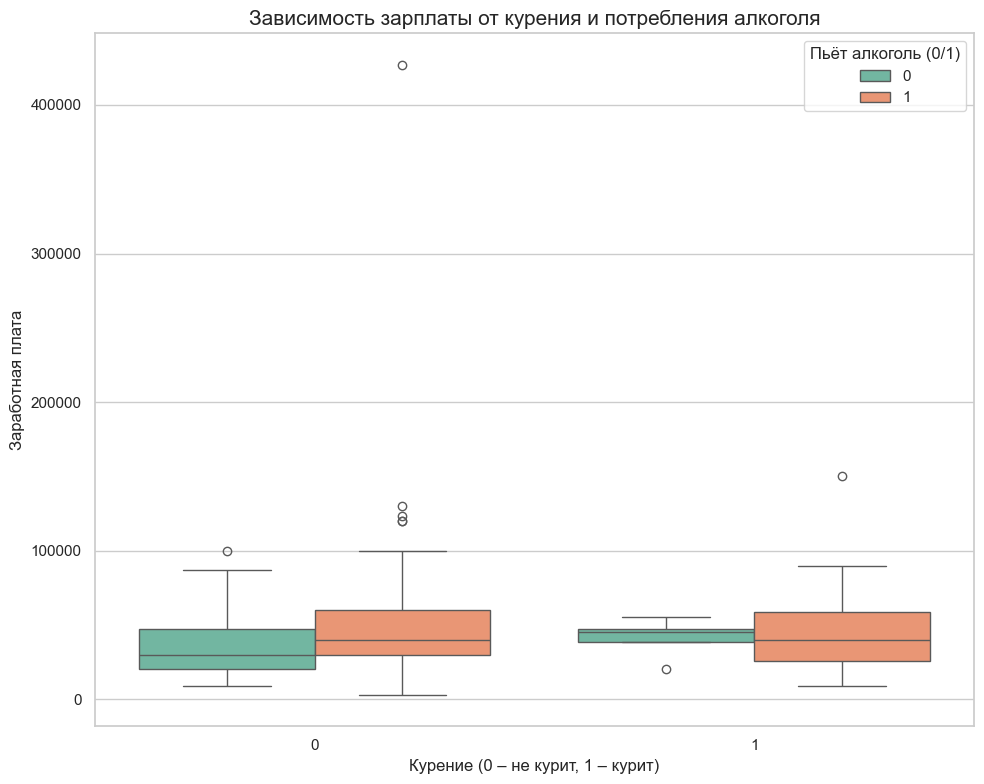

In [152]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='smoke', y='wage', hue='alcohol', data=df, palette='Set2')
plt.title('Зависимость зарплаты от курения и потребления алкоголя', fontsize=15)
plt.xlabel('Курение (0 – не курит, 1 – курит)')
plt.ylabel('Заработная плата')
plt.legend(title='Пьёт алкоголь (0/1)')
plt.tight_layout()
plt.show()

Яркой зависимости между наличием вредных привычек и заработной платой не наюлюдается. Средние и медианы примерно на одном уровне во всех группах. **Влияние вредных привычек на доход в выборке либо отсутствует, либо крайне слабое**

# 10

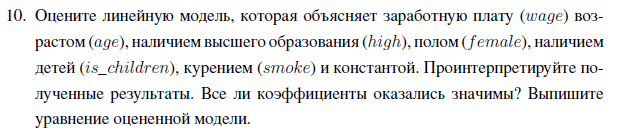

In [156]:
ols_10 = smf.ols('wage ~ age + educ + female + is_children + smoke', data=df).fit()
print(ols_10.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.185
Model:                            OLS   Adj. R-squared:                  0.160
Method:                 Least Squares   F-statistic:                     7.220
Date:                Sun, 20 Jul 2025   Prob (F-statistic):           2.85e-05
Time:                        12:43:44   Log-Likelihood:                -1580.2
No. Observations:                 132   AIC:                             3170.
Df Residuals:                     127   BIC:                             3185.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    3.784e+04   9974.318      3.793      

## Уравнение оцененной модели:

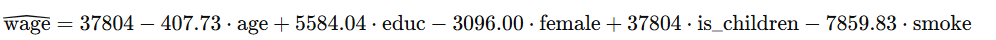

## Значимость коэффициентов

На уровне значимости 5% **статистически значимы коэффициенты перед переменными female (пол) и is_children (наличие детей)**. Остальные переменные незначимы.\
Это связано с **маленьким количеством наблюдений** (всего 132 наблюдения). Плюс **данные по зарплате очень шумные, много выбросов**. Поэтому далее я построю еще несколько моделей, в том числе модель с логарифмированной зарплатой.\
**Формы зависимости нелинейные**, например зависимость от возраста затухающая, поэтому далее я попробую включить в модель возраст в квадрате.\
**Возможна мультиколлинеарность** (есть предупреждение в summary)

## Проверка мультиколлинеарности с помощью VIF

In [162]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df[['age', 'educ', 'female', 'is_children', 'smoke']]
X = sm.add_constant(X)
vif_data = pd.DataFrame()
vif_data['variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

      variable        VIF
0          age   1.115827
1         educ   1.301323
2       female   1.102027
3  is_children  34.513303
4        smoke   1.275980


In [163]:
df['is_children'].value_counts()

is_children
1    132
Name: count, dtype: int64

Заметим, что переменная is_children не несет никакой информации, являясь константой. Лучше удалить ее из модели.

По другим признакам VIF < 5, значит **мультиколлинеарности нет**

In [166]:
ols_10_no_children = smf.ols('wage ~ age + educ + female + smoke', data=df).fit()
print(ols_10_no_children.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.185
Model:                            OLS   Adj. R-squared:                  0.160
Method:                 Least Squares   F-statistic:                     7.220
Date:                Sun, 20 Jul 2025   Prob (F-statistic):           2.85e-05
Time:                        12:43:44   Log-Likelihood:                -1580.2
No. Observations:                 132   AIC:                             3170.
Df Residuals:                     127   BIC:                             3185.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.567e+04   1.99e+04      3.793      0.0

## Модель с квадратом возраста

In [168]:
ols_10_age2= smf.ols('wage ~ age + I(age**2) + educ + female + smoke', data=df).fit()
print(ols_10_age2.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.187
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     5.807
Date:                Sun, 20 Jul 2025   Prob (F-statistic):           7.35e-05
Time:                        12:43:44   Log-Likelihood:                -1580.0
No. Observations:                 132   AIC:                             3172.
Df Residuals:                     126   BIC:                             3189.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    4.362e+04   6.07e+04      0.719      

Несмотря на визуально наблюдаемую затухающую тенденцию, **коэффициент перед age**2 оказался незначимым.**\
Это может быть связано с большим разбросом зарплат, малой выборкой, нерепрезентативностью возраста конкретно в этой выборке.\
Заметим, что Skew = 5.8, что говорит о **большом количестве недооценненных моделью зарплат**. При этом по Kurtosis = 50 легко понять, что **большое количество выбросов плохо объясняется моделью.**\
Таким образом, **распределение целевой переменной слишком грязное**, линейная модель не справляется с ним.\
Поэтому самым логичным шагом будет оценить модель с логарифмированной зарплатой.

## Модель с логарифмироавнной зарплатой

In [171]:
df['log_wage'] = np.log1p(df['wage'])

C:\Users\User\AppData\Local\Temp\ipykernel_13816\3313493804.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['log_wage'] = np.log1p(df['wage'])


In [172]:
ols_10_logwage = smf.ols('log_wage ~ age + I(age**2) + educ + female + smoke', data=df).fit()
print(ols_10_logwage.summary())

                            OLS Regression Results                            
Dep. Variable:               log_wage   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.250
Method:                 Least Squares   F-statistic:                     9.718
Date:                Sun, 20 Jul 2025   Prob (F-statistic):           7.20e-08
Time:                        12:43:44   Log-Likelihood:                -104.64
No. Observations:                 132   AIC:                             221.3
Df Residuals:                     126   BIC:                             238.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       9.5591      0.848     11.266      

Ситуация значительно улучшилась. Теперь **на уровне значимости 10% значимы регрессоры age, age^2, educ, female.**

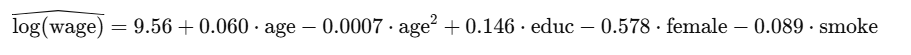

**R^2 значительно вырос**, модель лучше объясняет дисперсию зависимой переменнной.\
**Распределение остатков стало ближе к нормальному** (Skew = -0.36, Kurtosis = 7), что более чем адекватно по сравнению с базовой моделью.

### Интерпретация коэффициентов

**age**: При увеличении возраста на 1 год зарплата растёт на ~6%, если остальные переменные постоянны\
**age^2**: коэффициент = -0.0007, подтверждая замедление роста зарплаты с возрастом\
**educ**: Каждый дополнительный уровень образования увеличивает заработную плату в среднем на 16.5% (коэффициент небольшой, поэтому интерпретируем напрямую)\
**female**: Женщины зарабатывают в среднем на 44% меньше мужчин (коэффициент по модулю больше 0.2 => для интерпретации я применил преобразование (e^b - 1)*100)\
**smoke**: Курящие зарабатывают в среднем на 8.9% меньше, но этот эффект незначим

# 11

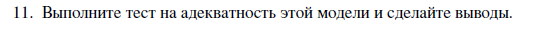

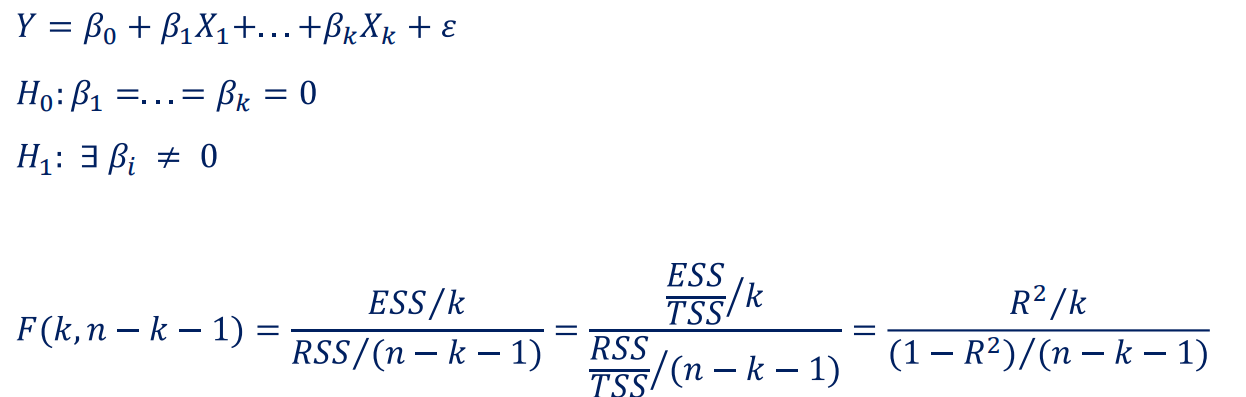

P-value для гипотезы о совместной незначимости коэффициентов =  7.20e-08 ~= 0.002. Основная гипотеза отвергается, **коэффициенты при выбранных факторах значимы в совокупности.**

# 12

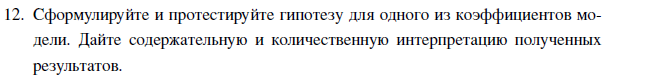

**H0:** Пика зарплаты нет или он находится в нереалистичном возрасте\
**H1:** Пик находится в разумном трудоспособном возрасте (примерно 30–55 лет)

In [185]:
b = ols_10_logwage.params
cov = ols_10_logwage.cov_params()
b1 = b['age']
b2 = b['I(age ** 2)']

age_max = -b1 / (2 * b2)

dg_db1 = -1 / (2 * b2)
dg_db2 = b1 / (2 * b2**2)
gradient = np.array([dg_db1, dg_db2])

cov_sub = cov.loc[['age', 'I(age ** 2)'], ['age', 'I(age ** 2)']]

se = np.sqrt(gradient.T @ cov_sub.values @ gradient)

#ДИ
lower = age_max - 1.96 * se
upper = age_max + 1.96 * se

print(f"Возраст пика зарплаты: {age_max:.2f} лет")
print(f"95% Доверительный интервал: от {lower:.2f} до {upper:.2f} лет")


Возраст пика зарплаты: 42.33 лет
95% Доверительный интервал: от 34.12 до 50.54 лет


В модели с квадратичным возрастом обнаружен **пик заработной платы**, приходящийся на возраст 42.3 года.
95%-ный доверительный интервал для этой точки составляет от 34.1 до 50.5 лет, что указывает на то, что **наиболее высокие значения дохода наблюдаются у респондентов среднего возраста**.

Это подтверждает **наличие нелинейной затухающей зависимости между возрастом и уровнем заработной платы.** Доход растёт с возрастом до определённого момента (накопление опыта, карьерный рост), после чего начинает снижаться (возможное замедление карьерного продвижения, возрастная дискриминация, выгорание или смена приоритетов).

**Доверительный интервал достаточно узкий и целиком находится в пределах активного трудового возраста**, что говорит о статистической уверенности модели в наличии такого пика.

# 13

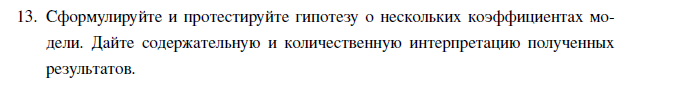

**H0:** βeduc = −βfemale. Образование и пол одинаково влияют на зарплату по величине (то есть повышение образования на 1 уровень компенсирует "штраф" за женский пол)\
**H1:** βeduc != −βfemale

In [190]:
ols_10_logwage.f_test("educ + female = 0")

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=13.917446119511048, p=0.0002876296131716335, df_denom=126, df_num=1>

p-value < 0.05 => **одного дополнительного уровня образования недостаточно, чтобы скомпенсировать гендерный разрыв**

Мне стало интересно, **сколько дополнительных уровней образования нужно женщине**, чтобы зарабатывать столько же, сколько мужчина, при прочих равных.

Необходимое увеличение образования = |βfemale|/βeduc\
0.578/0.164 = 3.52\
Получается, **нужно больше 3 уровней образования, чтобы скомпенсировать гендерный разрыв в зарплате**. При этом в данных представлены только 3 уровня образования.\
Можем сделать вывод, что **гендерное неравенство в заработных платах является большим и очень сложно устранимым явлением, определяющим распределение заработных плат на рынке труда**

# 14

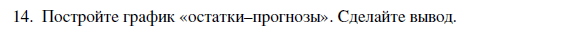

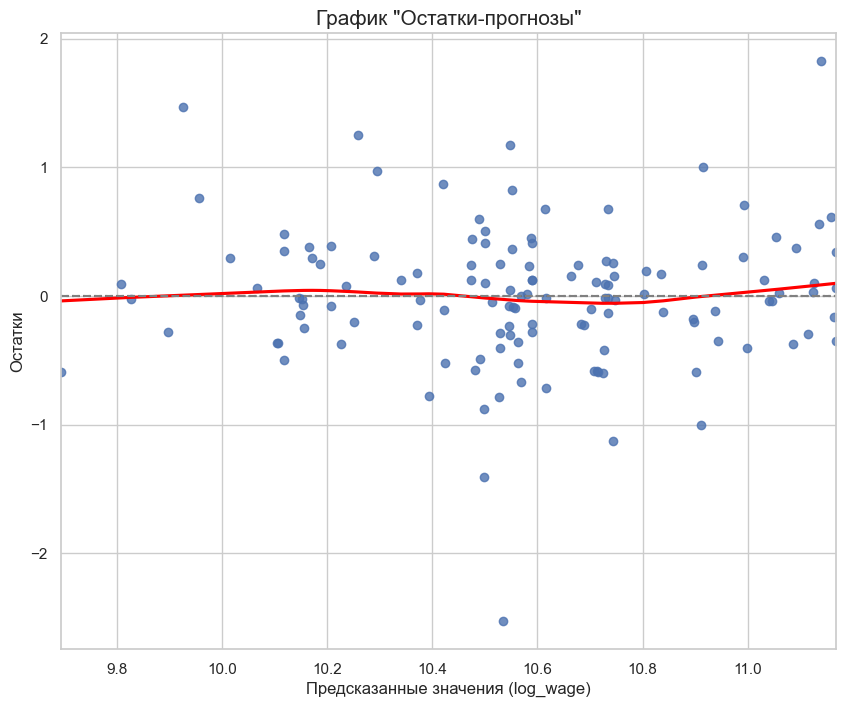

In [196]:
fitted = ols_10_logwage.fittedvalues
residuals = ols_10_logwage.resid

plt.figure(figsize=(10, 8))
sns.residplot(x=fitted, y=residuals, lowess=True, line_kws={'color': 'red'})
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel('Предсказанные значения (log_wage)')
plt.ylabel('Остатки')
plt.title('График "Остатки-прогнозы"', fontsize=15)
plt.show()

Остатки хаотично разбросаны вокруг нуля. Нет явной кривизны, lowess кривая близка к горизонтальной. Следовательно, **модель специфицирована правильно**.\
Распределение остатков равномерно по всей шкале логарифмированной зарплаты => **гомоскедастичность, модель стабильно работает на всем диапазоне зарплат**.

# 15

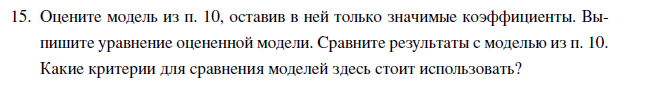

In [200]:
ols_15_logwage = smf.ols('log_wage ~ age + I(age**2) + educ + female', data=df).fit() #убираем 1 незначимый фактор - smoke
print(ols_15_logwage.summary())

                            OLS Regression Results                            
Dep. Variable:               log_wage   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.252
Method:                 Least Squares   F-statistic:                     12.03
Date:                Sun, 20 Jul 2025   Prob (F-statistic):           2.55e-08
Time:                        12:43:45   Log-Likelihood:                -104.97
No. Observations:                 132   AIC:                             219.9
Df Residuals:                     127   BIC:                             234.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       9.5849      0.847     11.322      

## Сравнение моделей

In [202]:
print(round(ols_10_logwage.rsquared_adj, 3))
print(round(ols_15_logwage.rsquared_adj, 3))

0.25
0.252


In [203]:
print(ols_10_logwage.aic, ols_10_logwage.bic)
print(ols_15_logwage.aic, ols_15_logwage.bic)

221.28666966759218 238.5834812031104
219.93647076288752 234.3504803758194


In [204]:
# F-test на вложенность моделей
f_test_result = ols_10_logwage.compare_f_test(ols_15_logwage)
print(f"F = {f_test_result[0]}, p-value = {f_test_result[1]}")

F = 0.6217938896446386, p-value = 0.43186255785834315


R^2 adjusted увеличился после ударения незначимого признака => **доля объясненной дисперсии увеличилась**.\
Критерии AIC и BIC уменьшились => **усеченная модель сохраняет качество при меньшем числе параметров**\
p-value в F-test на вложенность моделей равно 0.43 => **удаление фактора smoke не ухудшило модель**\
Таким образом, **усеченная модель предпочтительнее полной**

# 16

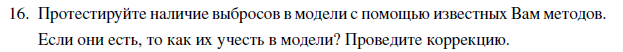

Далее я использую модель из пункта 15, так как ранее выявил, что она предпочтительнее модели из пункта 10

## QQ-plot

<Figure size 1000x800 with 0 Axes>

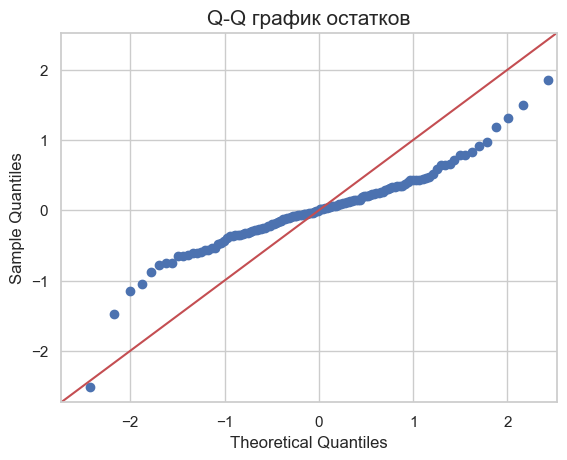

In [210]:
plt.figure(figsize=(10, 8))
sm.qqplot(ols_15_logwage.resid, line='45')
plt.title("Q-Q график остатков", fontsize=15)
plt.show()

**Основная масса остатков распределена нормально**. Наличие нескольких выбросов в хвостах не искажает общую форму

## Анализ DFFITS и DFBETA

In [213]:
influence = ols_15_logwage.get_influence()

In [214]:
from statsmodels.stats.outliers_influence import OLSInfluence

dffits, _ = influence.dffits
df['dffits'] = dffits

#выбросы, если |DFFITS| > 2 * sqrt(k / n)
n = ols_15_logwage.nobs
k = ols_15_logwage.df_model + 1  
threshold = 2 * (k / n) ** 0.5

df_dffits_outliers = df[abs(df['dffits']) > threshold]

C:\Users\User\AppData\Local\Temp\ipykernel_13816\4163525409.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dffits'] = dffits


In [215]:
df_dffits_outliers.shape

(6, 19)

In [216]:
dfbetas = influence.dfbetas
df_betas = pd.DataFrame(dfbetas, columns=ols_15_logwage.params.index)
df_betas['max_abs'] = df_betas.abs().max(axis=1)

df['dfbeta_max'] = df_betas['max_abs'].values

#выбросы, если |DFBETA| > 2 / sqrt(n)
threshold_dfbeta = 2 / n**0.5

df_dfbeta_outliers = df[df['dfbeta_max'] > threshold_dfbeta]

C:\Users\User\AppData\Local\Temp\ipykernel_13816\451491100.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dfbeta_max'] = df_betas['max_abs'].values


In [217]:
df_dfbeta_outliers.shape

(13, 20)

In [218]:
df[(df['dfbeta_max'] > threshold_dfbeta) & (abs(df['dffits']) > threshold)].shape

(6, 20)

In [219]:
df[(df['dfbeta_max'] > threshold_dfbeta) & (abs(df['dffits']) > threshold)]

,region,educ,age,female,industry,work_hours,wage,foreign_language,internet,alcohol,is_children,health,weight,height,smoke,ln_wage,educ_level,log_wage,dffits,dfbeta_max
329,Челябинск,0,41.0,1,ДРУГАЯ ОТРАСЛЬ ТЯЖЕЛОЙ ПРОМЫШЛЕННОСТИ,12,100000.0,0,1,1,1,1,81.0,162.0,0,11.512925,Школа,11.512935,0.501528,0.355681
1323,Челябинск,0,64.0,1,ВОЕННО-ПРОМЫШЛЕННЫЙ КОМПЛЕКС,12,89000.0,0,1,1,1,0,70.0,160.0,0,11.396392,Школа,11.396403,0.735254,0.397893
1325,Челябинск,2,36.0,0,ДРУГАЯ ОТРАСЛЬ ТЯЖЕЛОЙ ПРОМЫШЛЕННОСТИ,8,427000.0,0,1,1,1,1,96.0,184.0,0,12.964539,"Университет, академия, институт",12.964542,0.668177,0.392882
3385,Челябинск,0,70.5,1,"ТОРГОВЛЯ, БЫТОВОЕ ОБСЛУЖИВАНИЕ",2,9000.0,0,0,0,1,1,73.0,164.0,0,9.104980,Школа,9.105091,-0.531127,0.423780
3613,Челябинск,2,33.5,1,СТРОИТЕЛЬСТВО,8,3000.0,1,1,1,1,0,55.0,175.0,0,8.006368,"Университет, академия, институт",8.006701,-0.963351,0.413412
3876,Челябинск,2,44.0,1,"ТОРГОВЛЯ, БЫТОВОЕ ОБСЛУЖИВАНИЕ",7,8860.0,0,1,1,1,1,62.0,172.0,1,9.089302,"Университет, академия, институт",9.089415,-0.443261,0.195632


In [220]:
df[(df['dfbeta_max'] > threshold_dfbeta)]

,region,educ,age,female,industry,work_hours,wage,foreign_language,internet,alcohol,is_children,health,weight,height,smoke,ln_wage,educ_level,log_wage,dffits,dfbeta_max
329,Челябинск,0,41.0,1,ДРУГАЯ ОТРАСЛЬ ТЯЖЕЛОЙ ПРОМЫШЛЕННОСТИ,12,100000.0,0,1,1,1,1,81.0,162.0,0,11.512925,Школа,11.512935,0.501528,0.355681
611,Челябинск,0,45.5,0,"АРМИЯ, МВД, ОРГАНЫ БЕЗОПАСНОСТИ",24,15000.0,0,1,1,1,0,62.0,170.0,1,9.615805,Школа,9.615872,-0.375706,0.202440
1323,Челябинск,0,64.0,1,ВОЕННО-ПРОМЫШЛЕННЫЙ КОМПЛЕКС,12,89000.0,0,1,1,1,0,70.0,160.0,0,11.396392,Школа,11.396403,0.735254,0.397893
1325,Челябинск,2,36.0,0,ДРУГАЯ ОТРАСЛЬ ТЯЖЕЛОЙ ПРОМЫШЛЕННОСТИ,8,427000.0,0,1,1,1,1,96.0,184.0,0,12.964539,"Университет, академия, институт",12.964542,0.668177,0.392882
1654,Челябинск,2,58.0,0,ЮРИСПРУДЕНЦИЯ,10,120000.0,1,1,1,1,0,120.0,185.0,0,11.695247,"Университет, академия, институт",11.695255,0.315092,0.208563
2100,Челябинск,2,31.0,1,СТРОИТЕЛЬСТВО,8,15000.0,0,1,1,1,0,75.0,164.0,0,9.615805,"Университет, академия, институт",9.615872,-0.368553,0.226984
2105,Челябинск,1,69.5,1,ОБРАЗОВАНИЕ,8,15000.0,0,0,0,1,0,74.0,164.0,0,9.615805,"ПТУ, техническое училище",9.615872,-0.244275,0.193776
3385,Челябинск,0,70.5,1,"ТОРГОВЛЯ, БЫТОВОЕ ОБСЛУЖИВАНИЕ",2,9000.0,0,0,0,1,1,73.0,164.0,0,9.104980,Школа,9.105091,-0.531127,0.423780
3613,Челябинск,2,33.5,1,СТРОИТЕЛЬСТВО,8,3000.0,1,1,1,1,0,55.0,175.0,0,8.006368,"Университет, академия, институт",8.006701,-0.963351,0.413412
3876,Челябинск,2,44.0,1,"ТОРГОВЛЯ, БЫТОВОЕ ОБСЛУЖИВАНИЕ",7,8860.0,0,1,1,1,1,62.0,172.0,1,9.089302,"Университет, академия, институт",9.089415,-0.443261,0.195632


Заметим, что выбросами по критериям DFFITS и DFBETA в основном являются наблюдения с слишком высокими для Челябинска зарплатами, либо с неправдоподобно низкими (3000 руб, 9000 руб).\
Я решил попробовать смешанный подход. Первую модель я построю, **удалив выбросы**

In [222]:
df_16_1 = df[~((df['dfbeta_max'] > threshold_dfbeta) | (abs(df['dffits']) > threshold))]

In [223]:
ols_16_logwage = smf.ols('log_wage ~ age + I(age**2) + educ + female', data=df_16_1).fit()
print(ols_16_logwage.summary())

                            OLS Regression Results                            
Dep. Variable:               log_wage   R-squared:                       0.403
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     19.24
Date:                Sun, 20 Jul 2025   Prob (F-statistic):           4.08e-12
Time:                        12:43:46   Log-Likelihood:                -52.194
No. Observations:                 119   AIC:                             114.4
Df Residuals:                     114   BIC:                             128.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      10.1118      0.726     13.927      

С одной стороны, **доля объясненной дисперсии серьезно возросла, распределение остатков стало почти идеально нормальным**.\
С другой стороны, коэффициенты при возрасте стали незначимыми на всех разумных уровнях значимости, что ставит под вопрос выявленный затухающий эффект влияния возраста

## Модель с робастными ошибками

In [331]:
X = df[['age', 'educ', 'female']]
X['age2'] = df['age'] ** 2
X = sm.add_constant(X)
y = df['log_wage']

C:\Users\User\AppData\Local\Temp\ipykernel_13816\1324530015.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['age2'] = df['age'] ** 2


In [382]:
X

,const,age,educ,female,age2
329,1.0,41.0,0,1,1681.00
330,1.0,37.5,0,1,1406.25
331,1.0,52.0,1,0,2704.00
332,1.0,50.0,2,1,2500.00
333,1.0,52.5,0,1,2756.25
...,...,...,...,...,...
4325,1.0,55.0,2,0,3025.00
4326,1.0,46.5,1,0,2162.25
4327,1.0,56.0,0,0,3136.00
4328,1.0,25.5,0,0,650.25


In [333]:
# Робастная регрессия с HuberT
rlm_model = sm.RLM(y, X, M=sm.robust.norms.HuberT()).fit()
print(rlm_model.summary())

                    Robust linear Model Regression Results                    
Dep. Variable:               log_wage   No. Observations:                  132
Model:                            RLM   Df Residuals:                      127
Method:                          IRLS   Df Model:                            4
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sun, 20 Jul 2025                                         
Time:                        12:45:49                                         
No. Iterations:                    15                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.6442      0.696     13.851      0.0

**Все регрессоры значимы на уровне значимости 10%.**\
**Затухающая зависимость зарплаты от возраста подтверждается.** Коэффициент перед age положительный, а перед age2 отрицательный. Эта зависимость удержалась даже при робастной оценке, значит **результат устойчив к выбросам.**\
Все коэффициенты очень близки к коэффициентам из обычной регрессии, что говорит о **сохранении основных закономерностей и их статистической значимости**.\ 
На уровне значимости 10% стали значимы коэффициенты перед age и age2, которые до этого были значимы только на уровне 15%. Это говорит о том, что **выбросы искажали оценки OLS**, RLM помогла убедиться в наличии затухающей зависимости.\

### Остатки - прогнозы

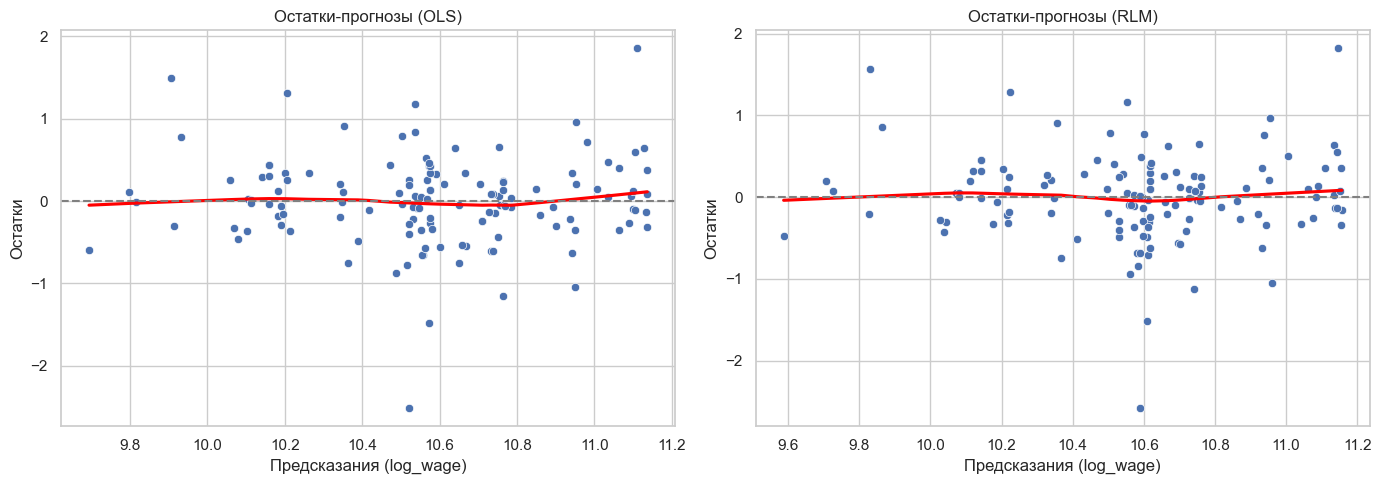

In [340]:
# OLS
df['ols_fitted'] = ols_15_logwage.fittedvalues
df['ols_resid'] = ols_15_logwage.resid

# RLM
df['rlm_fitted'] = rlm_model.fittedvalues
df['rlm_resid'] = rlm_model.resid

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# OLS
sns.scatterplot(x='ols_fitted', y='ols_resid', data=df, ax=axes[0])
sns.regplot(x='ols_fitted', y='ols_resid', data=df, scatter=False,
            lowess=True, color='red', ax=axes[0])
axes[0].axhline(0, linestyle='--', color='gray')
axes[0].set_title('Остатки-прогнозы (OLS)')
axes[0].set_xlabel('Предсказания (log_wage)')
axes[0].set_ylabel('Остатки')

# RLM
sns.scatterplot(x='rlm_fitted', y='rlm_resid', data=df, ax=axes[1])
sns.regplot(x='rlm_fitted', y='rlm_resid', data=df, scatter=False,
            lowess=True, color='red', ax=axes[1])
axes[1].axhline(0, linestyle='--', color='gray')
axes[1].set_title('Остатки-прогнозы (RLM)')
axes[1].set_xlabel('Предсказания (log_wage)')
axes[1].set_ylabel('Остатки')

plt.tight_layout()
plt.show()

**Обе модели демонстрируют адекватное распределение ошибок**. Графики почти идентичны, что свидетельствует о **корректной спецификации.**

### QQ-plot

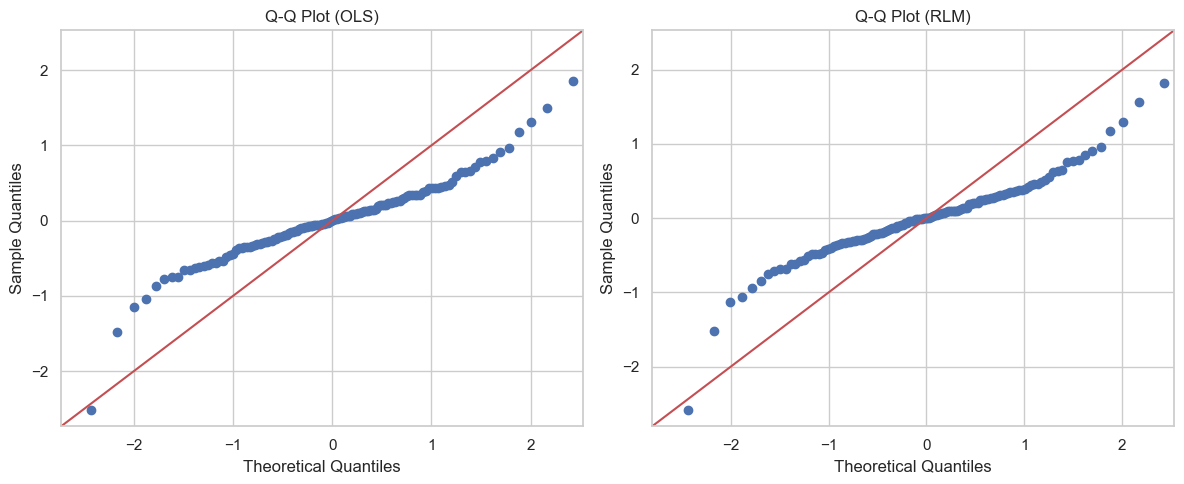

In [344]:
# Остатки
ols_resid = df['ols_resid']
rlm_resid = df['rlm_resid']

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# OLS
sm.qqplot(ols_resid, line='45', ax=axes[0])
axes[0].set_title('Q-Q Plot (OLS)')

# RLM
sm.qqplot(rlm_resid, line='45', ax=axes[1])
axes[1].set_title('Q-Q Plot (RLM)')

plt.tight_layout()
plt.show()


**Распределение ошибок близко к нормальному в обеих спецификациях**. Модель RLM слегка более устойчива к потенциальным выбросам, что визуально проявляется в меньших отклонениях крайних точек от теоретической линии.

### Сравнение предсказаний

In [355]:
df['ols_pred'] = ols_15_logwage.predict()
df['rlm_pred'] = rlm_model.predict()

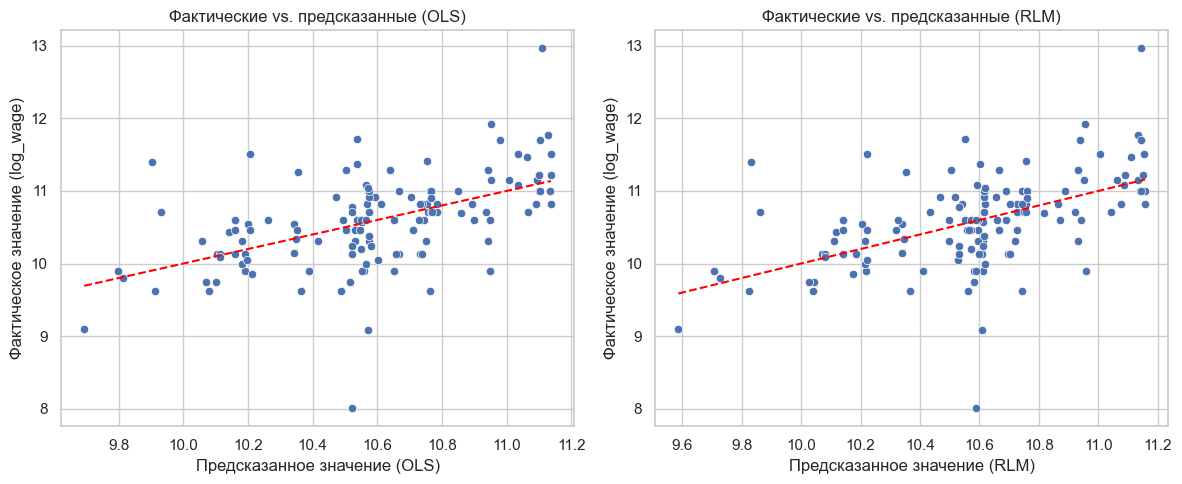

In [357]:
plt.figure(figsize=(12, 5))

# OLS
plt.subplot(1, 2, 1)
sns.scatterplot(x=df['ols_pred'], y=df['log_wage'])
plt.plot([df['ols_pred'].min(), df['ols_pred'].max()],
         [df['ols_pred'].min(), df['ols_pred'].max()],
         color='red', linestyle='--')
plt.xlabel('Предсказанное значение (OLS)')
plt.ylabel('Фактическое значение (log_wage)')
plt.title('Фактические vs. предсказанные (OLS)')

# RLM
plt.subplot(1, 2, 2)
sns.scatterplot(x=df['rlm_pred'], y=df['log_wage'])
plt.plot([df['rlm_pred'].min(), df['rlm_pred'].max()],
         [df['rlm_pred'].min(), df['rlm_pred'].max()],
         color='red', linestyle='--')
plt.xlabel('Предсказанное значение (RLM)')
plt.ylabel('Фактическое значение (log_wage)')
plt.title('Фактические vs. предсказанные (RLM)')

plt.tight_layout()
plt.show()


In [359]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
y_true = df['log_wage']
ols_pred = df['ols_pred']
rlm_pred = df['rlm_pred']

# MAE
mae_ols = mean_absolute_error(y_true, ols_pred)
mae_rlm = mean_absolute_error(y_true, rlm_pred)

# MSE
mse_ols = mean_squared_error(y_true, ols_pred)
mse_rlm = mean_squared_error(y_true, rlm_pred)

# RMSE
rmse_ols = np.sqrt(mse_ols)
rmse_rlm = np.sqrt(mse_rlm)

print(f"OLS: MAE={mae_ols:.4f}, MSE={mse_ols:.4f}, RMSE={rmse_ols:.4f}")
print(f"RLM: MAE={mae_rlm:.4f}, MSE={mse_rlm:.4f}, RMSE={rmse_rlm:.4f}")


OLS: MAE=0.3765, MSE=0.2872, RMSE=0.5359
RLM: MAE=0.3744, MSE=0.2890, RMSE=0.5376


In [361]:
from sklearn.metrics import r2_score
r2_rlm = r2_score(y_true, rlm_pred)
r2_ols = r2_score(y_true, ols_pred)

print(f"R² OLS: {r2_ols:.3f}")
print(f"R² RLM: {r2_rlm:.3f}")

R² OLS: 0.275
R² RLM: 0.270


**Модели демонстрируют схожее качество предсказаний**.\
Модель OLS немного выигрывает по RMSE и R², что указывает на **более плотную подгонку к исходным данным.**\
RLM показывает немного меньшую среднюю абсолютную ошибку (MAE), подтверждая свою **устойчивость к выбросам.**\
В нашем случае, когда выбросы есть, но их приемлемое количество, обе модели можно использовать, но я **предпочту RLM, так как коэффициенты более надежные и интерпретируемые, плюс эта модель более явно полсветила статистически значимый затухающий эффект возраста**

# 17

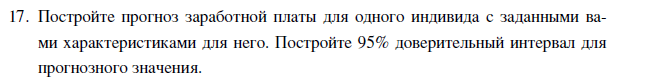

In [367]:
df

,region,educ,age,female,industry,work_hours,wage,foreign_language,internet,alcohol,...,educ_level,log_wage,dffits,dfbeta_max,ols_fitted,ols_resid,rlm_fitted,rlm_resid,ols_pred,rlm_pred
329,Челябинск,0,41.0,1,ДРУГАЯ ОТРАСЛЬ ТЯЖЕЛОЙ ПРОМЫШЛЕННОСТИ,12,100000.0,0,1,1,...,Школа,11.512935,0.501528,0.355681,10.205194,1.307741,10.223090,1.289845,10.205194,10.223090
330,Челябинск,0,37.5,1,ДРУГАЯ ОТРАСЛЬ ТЯЖЕЛОЙ ПРОМЫШЛЕННОСТИ,8,20000.0,0,1,1,...,Школа,9.903538,-0.111995,0.078757,10.190189,-0.286652,10.218576,-0.315038,10.190189,10.218576
331,Челябинск,1,52.0,0,"ТРАНСПОРТ, СВЯЗЬ",8,50000.0,0,1,1,...,"ПТУ, техническое училище",10.819798,-0.020963,0.013935,10.894500,-0.074702,10.862606,-0.042807,10.894500,10.862606
332,Челябинск,2,50.0,1,ОПЕРАЦИИ С НЕДВИЖИМОСТЬЮ,8,40000.0,0,1,1,...,"Университет, академия, институт",10.596660,0.017771,0.009163,10.537671,0.058989,10.552300,0.044360,10.537671,10.552300
333,Челябинск,0,52.5,1,"ТОРГОВЛЯ, БЫТОВОЕ ОБСЛУЖИВАНИЕ",8,34000.0,0,1,1,...,Школа,10.434145,0.097860,0.062092,10.141476,0.292670,10.118549,0.315596,10.141476,10.118549
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4325,Челябинск,2,55.0,0,ИНФОРМАЦИОННЫЕ И КОММУНИКАЦИОННЫЕ ТЕХНОЛОГИИ,8,100000.0,0,1,1,...,"Университет, академия, институт",11.512935,0.189385,0.126829,11.035143,0.477792,11.005034,0.507901,11.035143,11.005034
4326,Челябинск,1,46.5,0,ГРАЖДАНСКОЕ МАШИНОСТРОЕНИЕ,12,80000.0,0,1,1,...,"ПТУ, техническое училище",11.289794,0.094044,0.059776,10.942993,0.346802,10.931634,0.358160,10.942993,10.931634
4327,Челябинск,0,56.0,0,СТРОИТЕЛЬСТВО,8,20000.0,0,1,1,...,Школа,9.903538,-0.239160,0.119625,10.650535,-0.746998,10.588379,-0.684841,10.650535,10.588379
4328,Челябинск,0,25.5,0,"ТОРГОВЛЯ, БЫТОВОЕ ОБСЛУЖИВАНИЕ",9,28000.0,0,1,1,...,Школа,10.239996,-0.247776,0.213810,10.579726,-0.339731,10.612360,-0.372364,10.579726,10.612360


Я хочу построить прогноз для **мужчины 25 лет с высшим образованием**

In [408]:
individ = {
    'age': 25,
    'educ': 2,
    'female': 0,
    'age2': 625
}
X_individ = pd.DataFrame([individ])
X_individ = sm.add_constant(X_individ, has_constant='add')

In [410]:
pred_log_wage = rlm_model.predict(X_individ)[0]

# Cтрою ДИ
cov = rlm_model.cov_params()
x_vec = X_individ.values[0]  # вектор признаков

# Стандартная ошибка прогноза:
se_pred = np.sqrt(x_vec.T @ cov.values @ x_vec)


z = norm.ppf(0.975)  # критическое значение для 95%
lower = pred_log_wage - z * se_pred
upper = pred_log_wage + z * se_pred

In [412]:
# Предсказанное значение зарплаты и ДИ

real_pred = np.expm1(pred_log_wage)
real_lower = np.expm1(lower)
real_upper = np.expm1(upper)

print(f'Согласно RLM модели, мужчина 25 лет с высшим образованием из Челябинска будет иметь заработную плату {round(real_pred)} рублей в месяц')

Согласно RLM модели, мужчина 25 лет с высшим образованием из Челябинска будет иметь заработную плату 59722 рублей в месяц


In [418]:
print(f'95% доверительный интервал для прогноза зарплаты данного индивида: от {round(real_lower)} до {round(real_upper)} рублей в месяц')

95% доверительный интервал для прогноза зарплаты данного индивида: от 43409 до 82167 рублей в месяц


Получается, что с вероятностью 95% 25-летний мужчина с высшим образованием зарабатывает в Челябинске не больше 82 тысяч в месяц. Это говорит об **очень низких зарплатах в регионах России**